In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
original_data = pd.read_csv('Pokemon.csv')

# EDA
## Divide the dataset to orignal and lengendary and explore the data

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [4]:
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [5]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [6]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
len(set(pokemon["Name"]))

800

In [8]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [9]:
# get all types
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Normal', 'Grass', 'Ghost', 'Fire', 'Ground', 'Bug', 'Fairy', 'Dark', 'Water', 'Rock', 'Dragon', 'Psychic', 'Electric', 'Steel', 'Poison', 'Flying', 'Ice', 'Fighting']


In [10]:
# pokemon that has only type1
pokemon["Type 2"].isna().sum()

386

## type 분포 확인

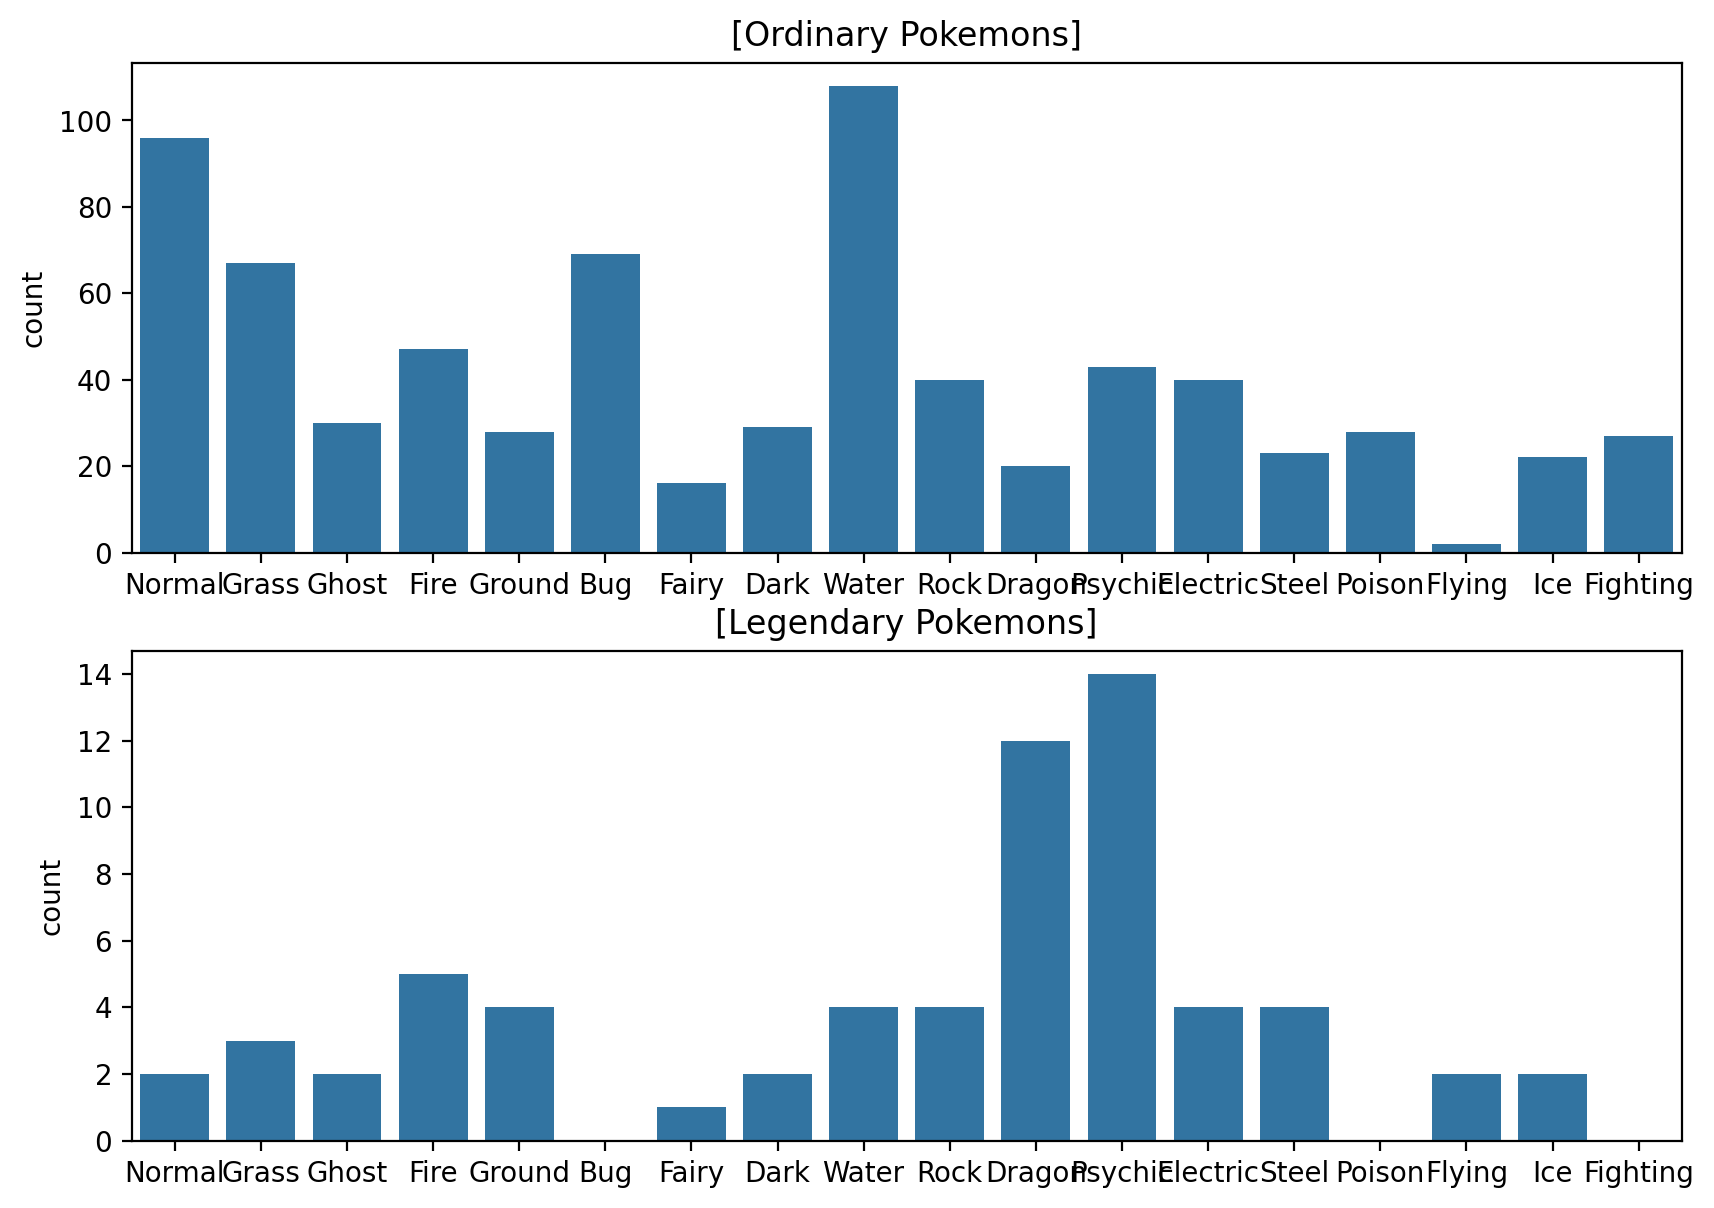

In [11]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

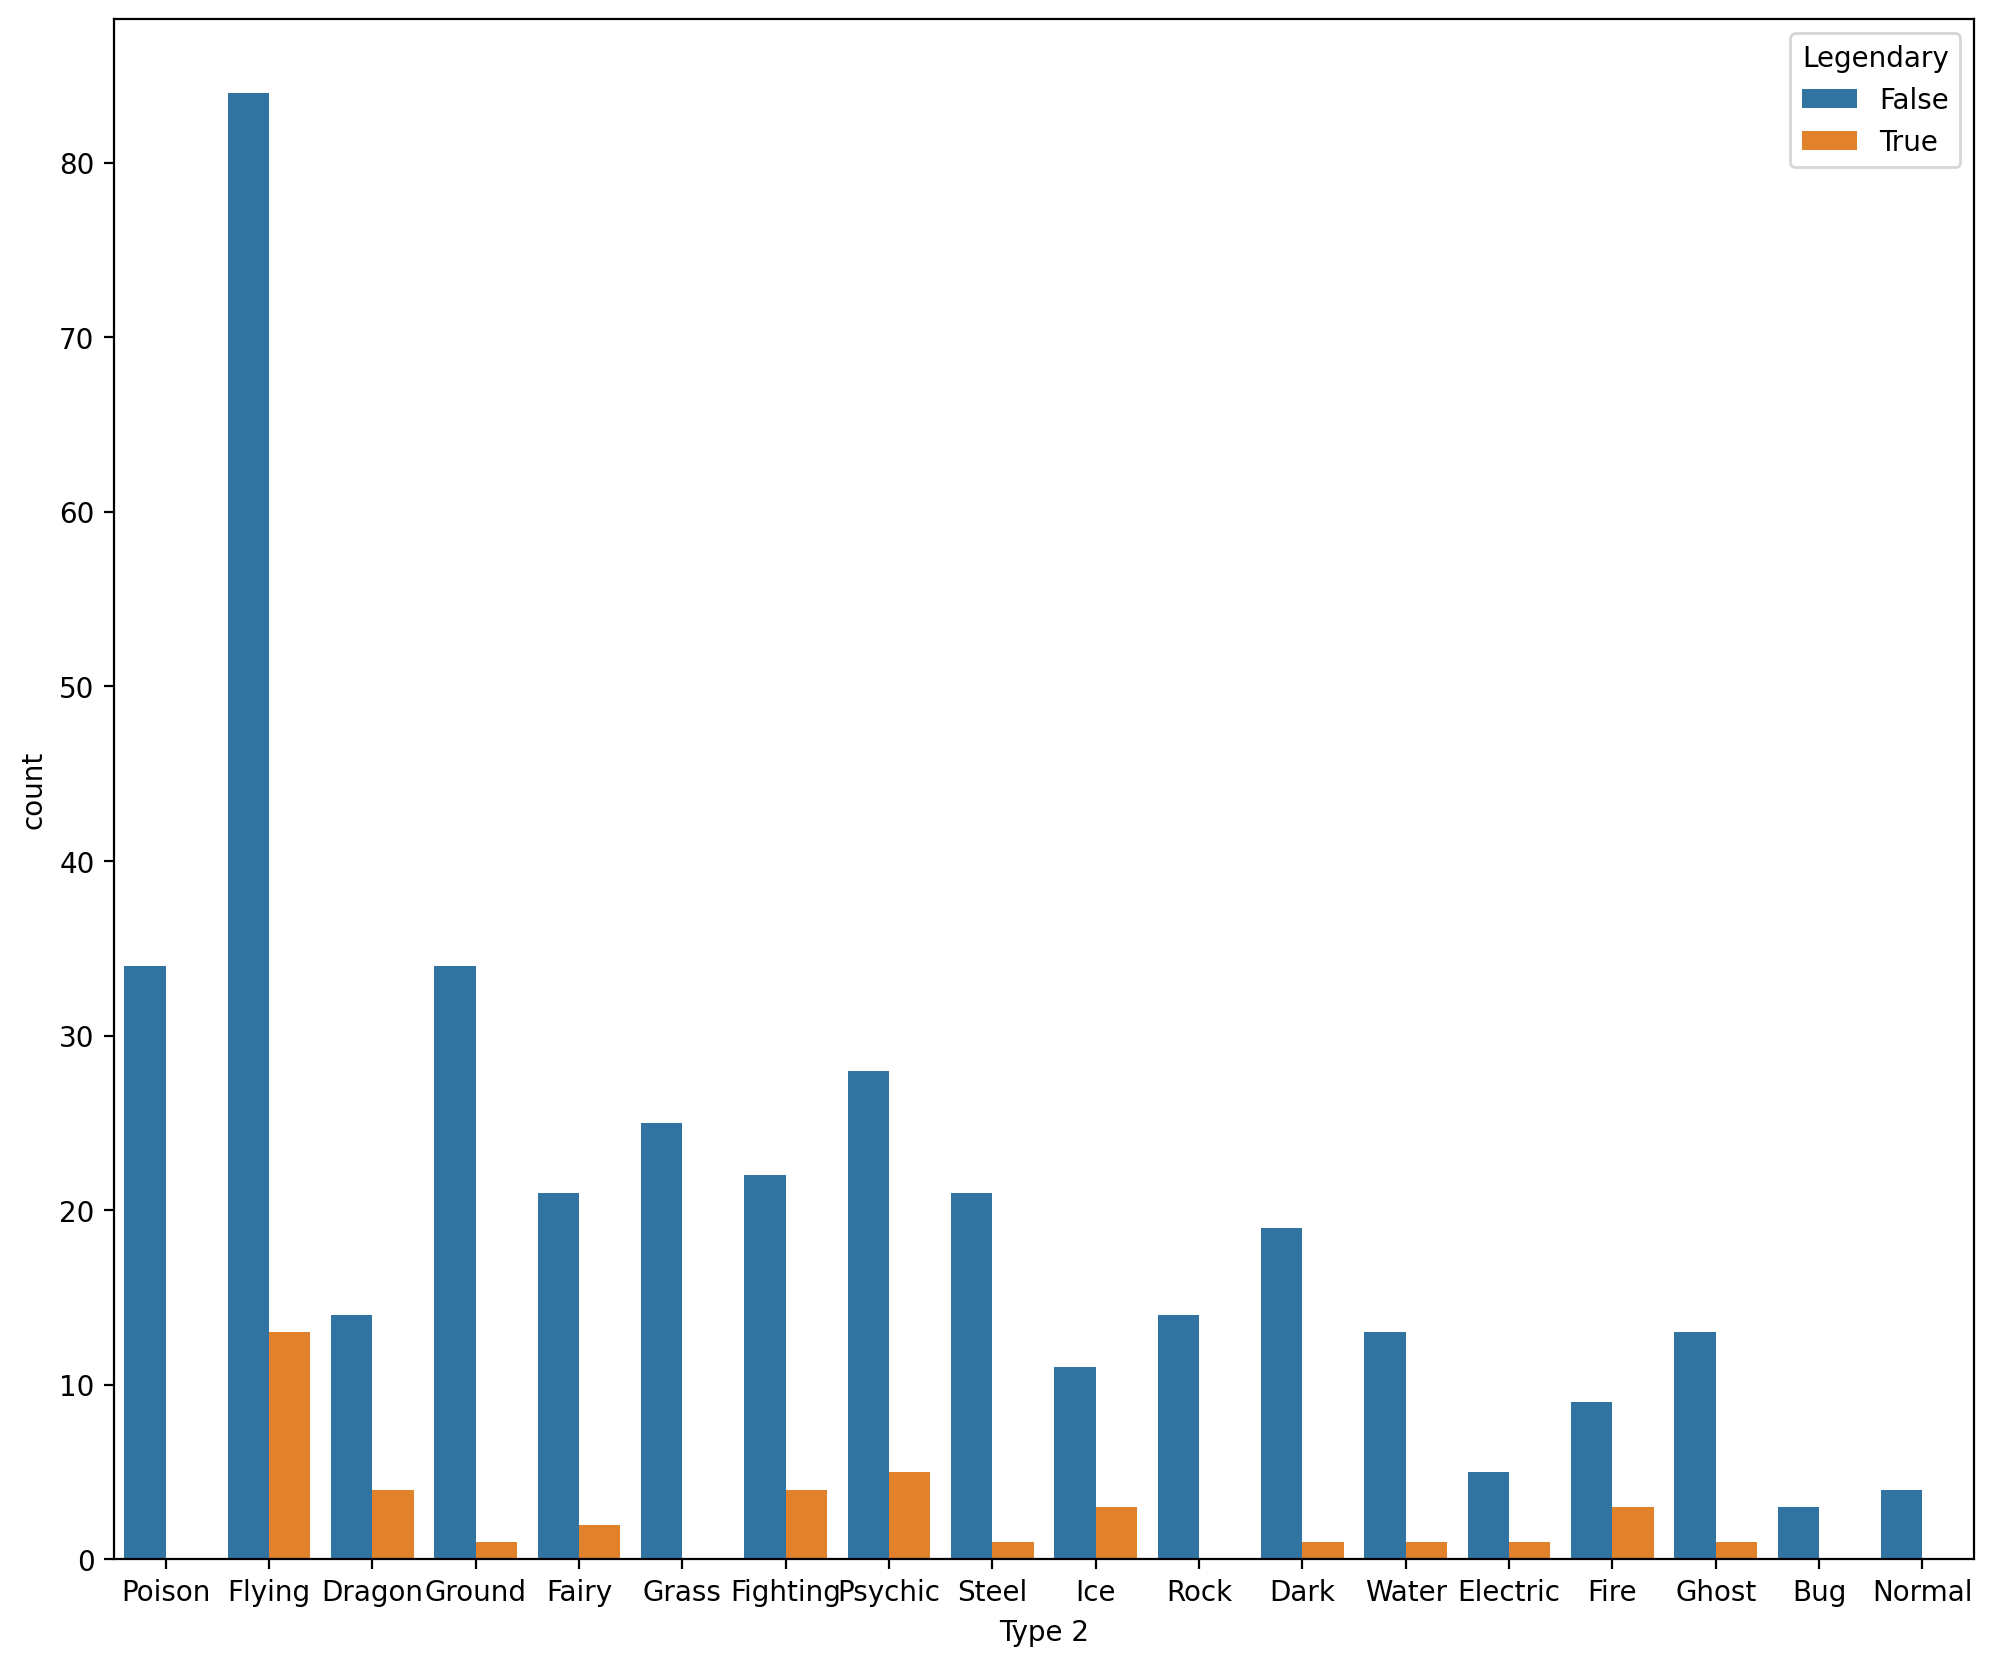

In [12]:
#legendary와 ordinary의 타입분포
plt.figure(figsize=(12, 10))
sns.countplot(data=pokemon, x='Type 2', hue='Legendary')
plt.show()

In [13]:
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

In [14]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000

## Total Stats Analysis

In [15]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [16]:
(pokemon['Total'].values == pokemon[stats].sum(axis=1)).sum()

800

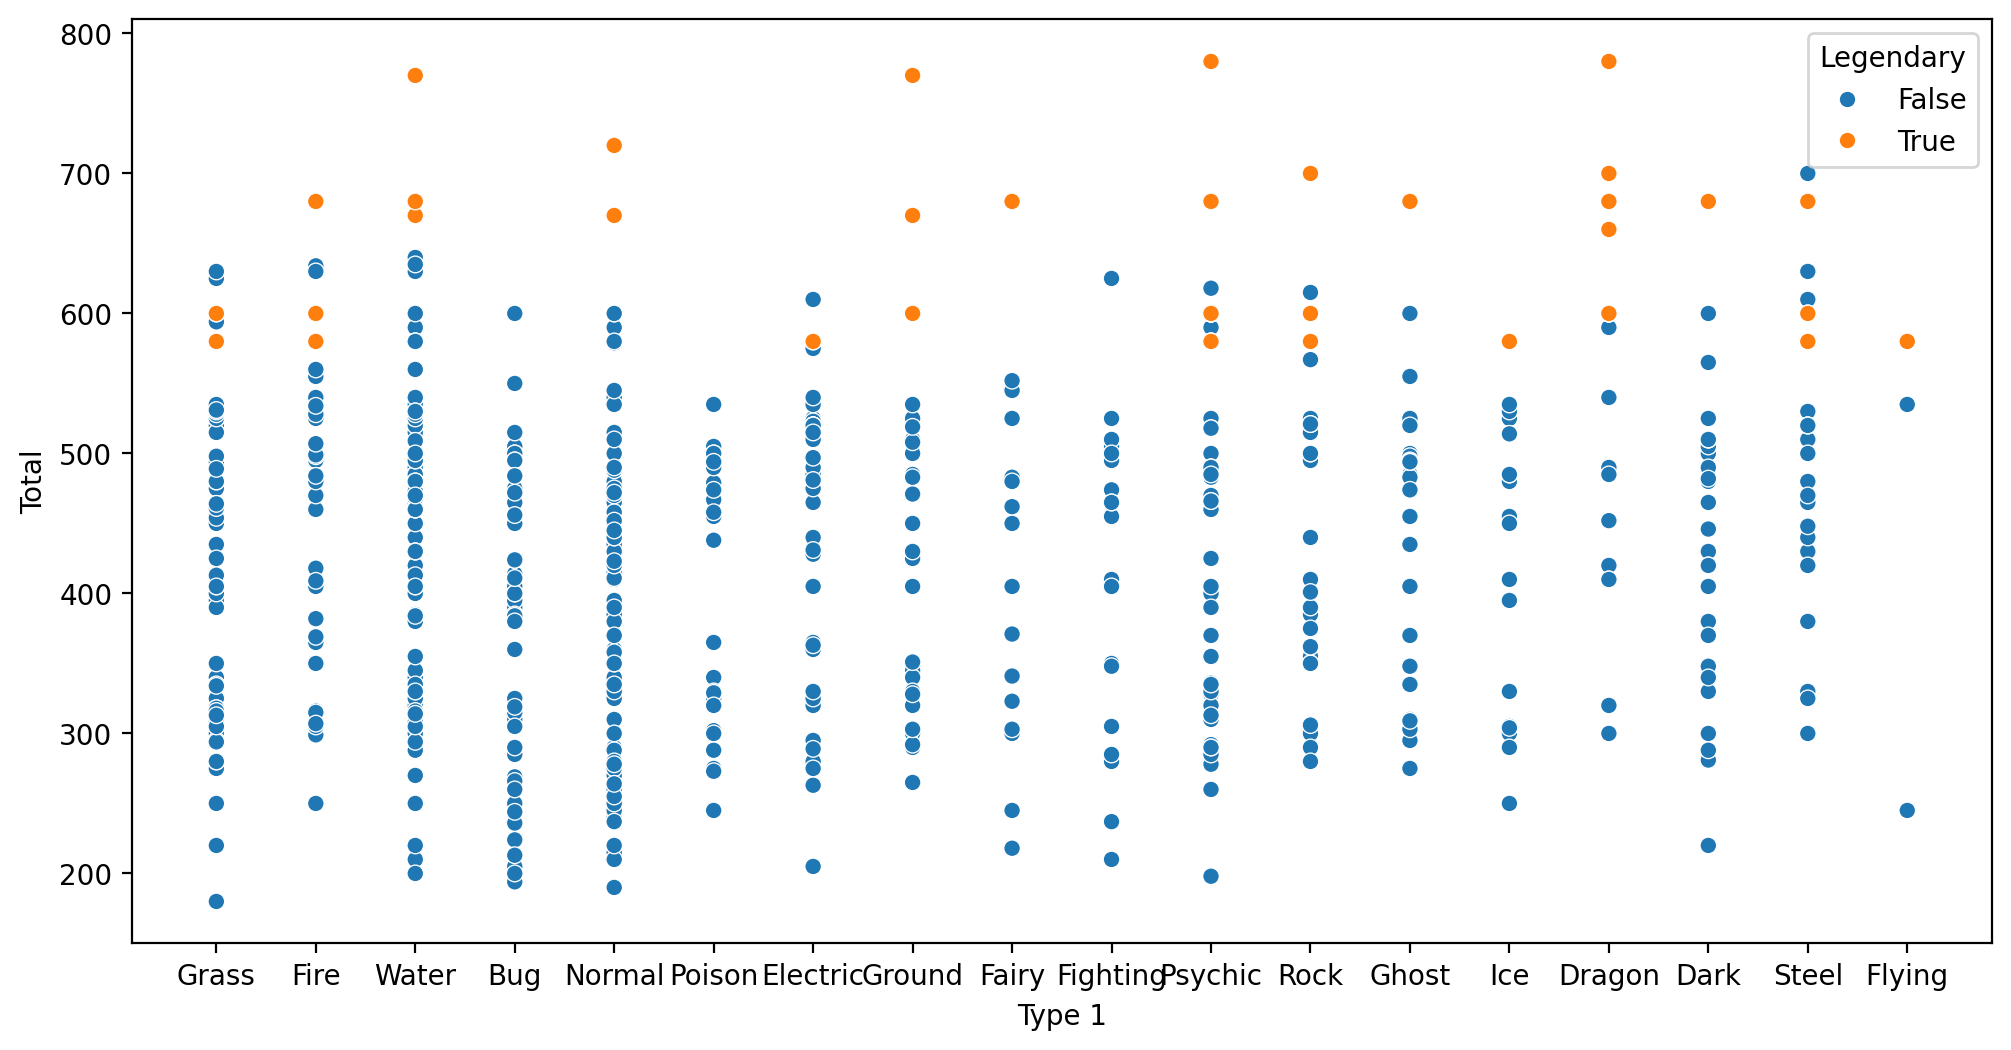

In [17]:
# scatter plot of total of legendary
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

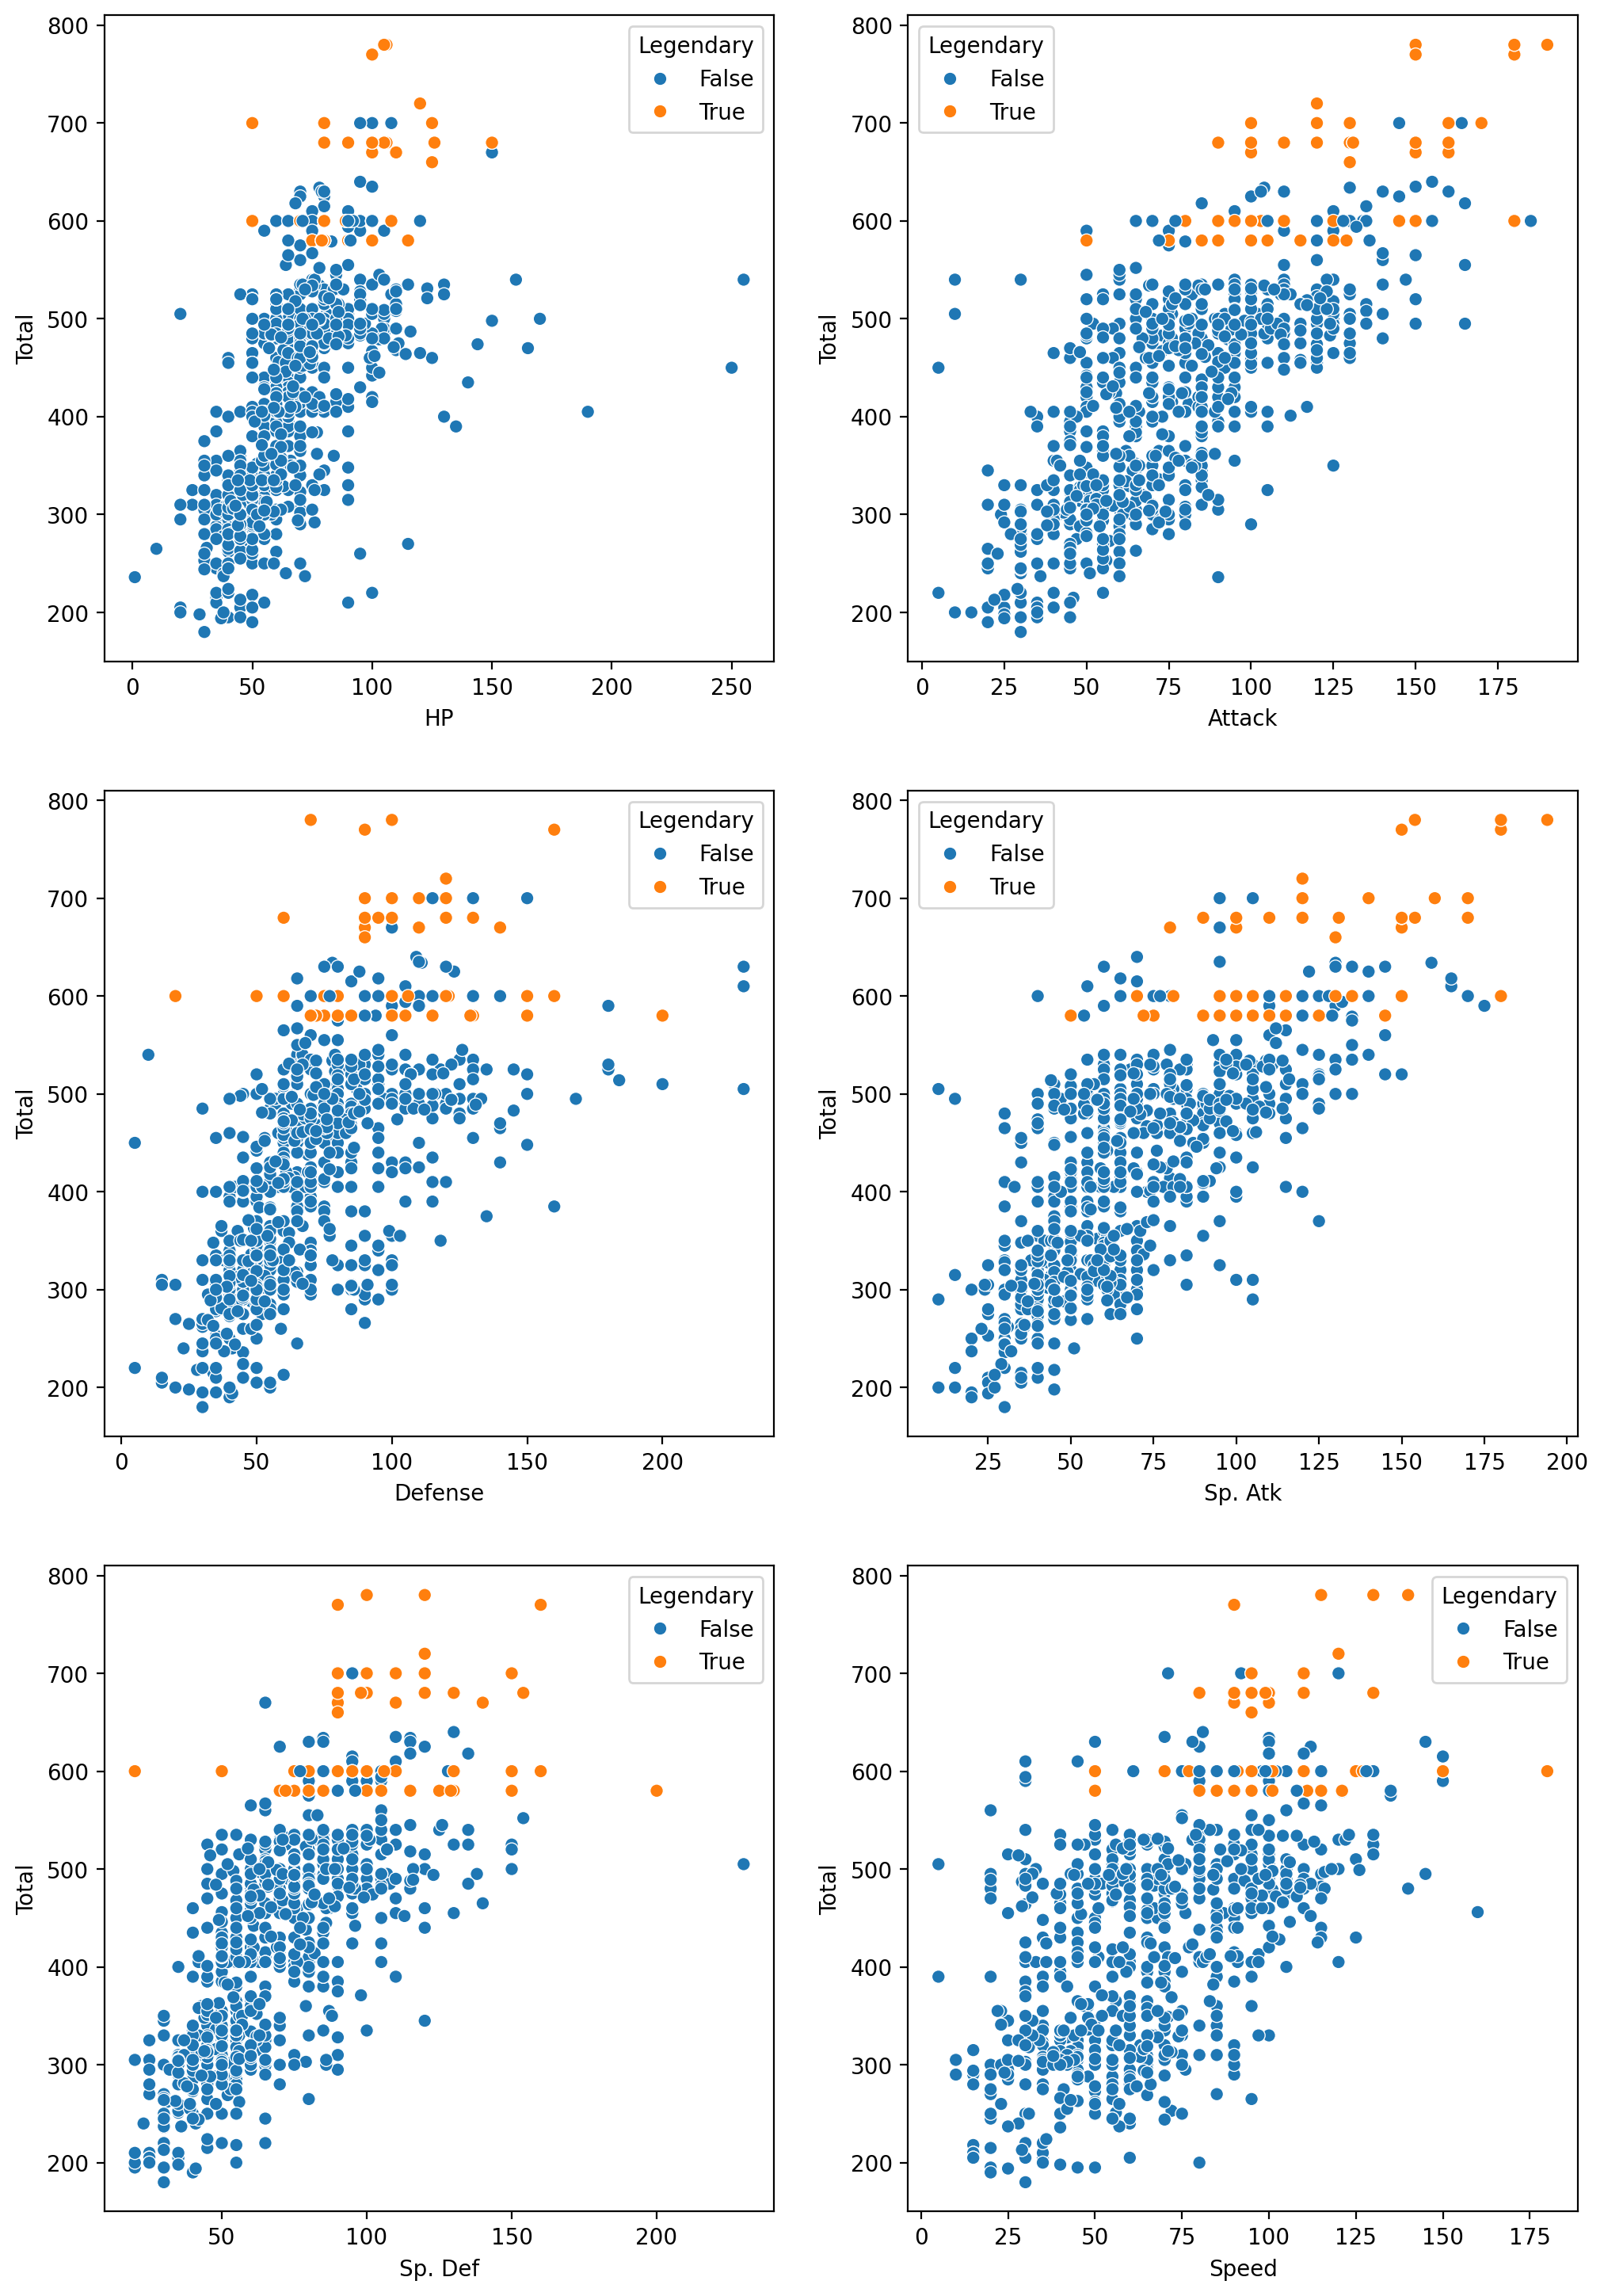

In [18]:
#scatterplot of stats on lengendary 
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18) 

# "HP"
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack"
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense"
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk"
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def"
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed"
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

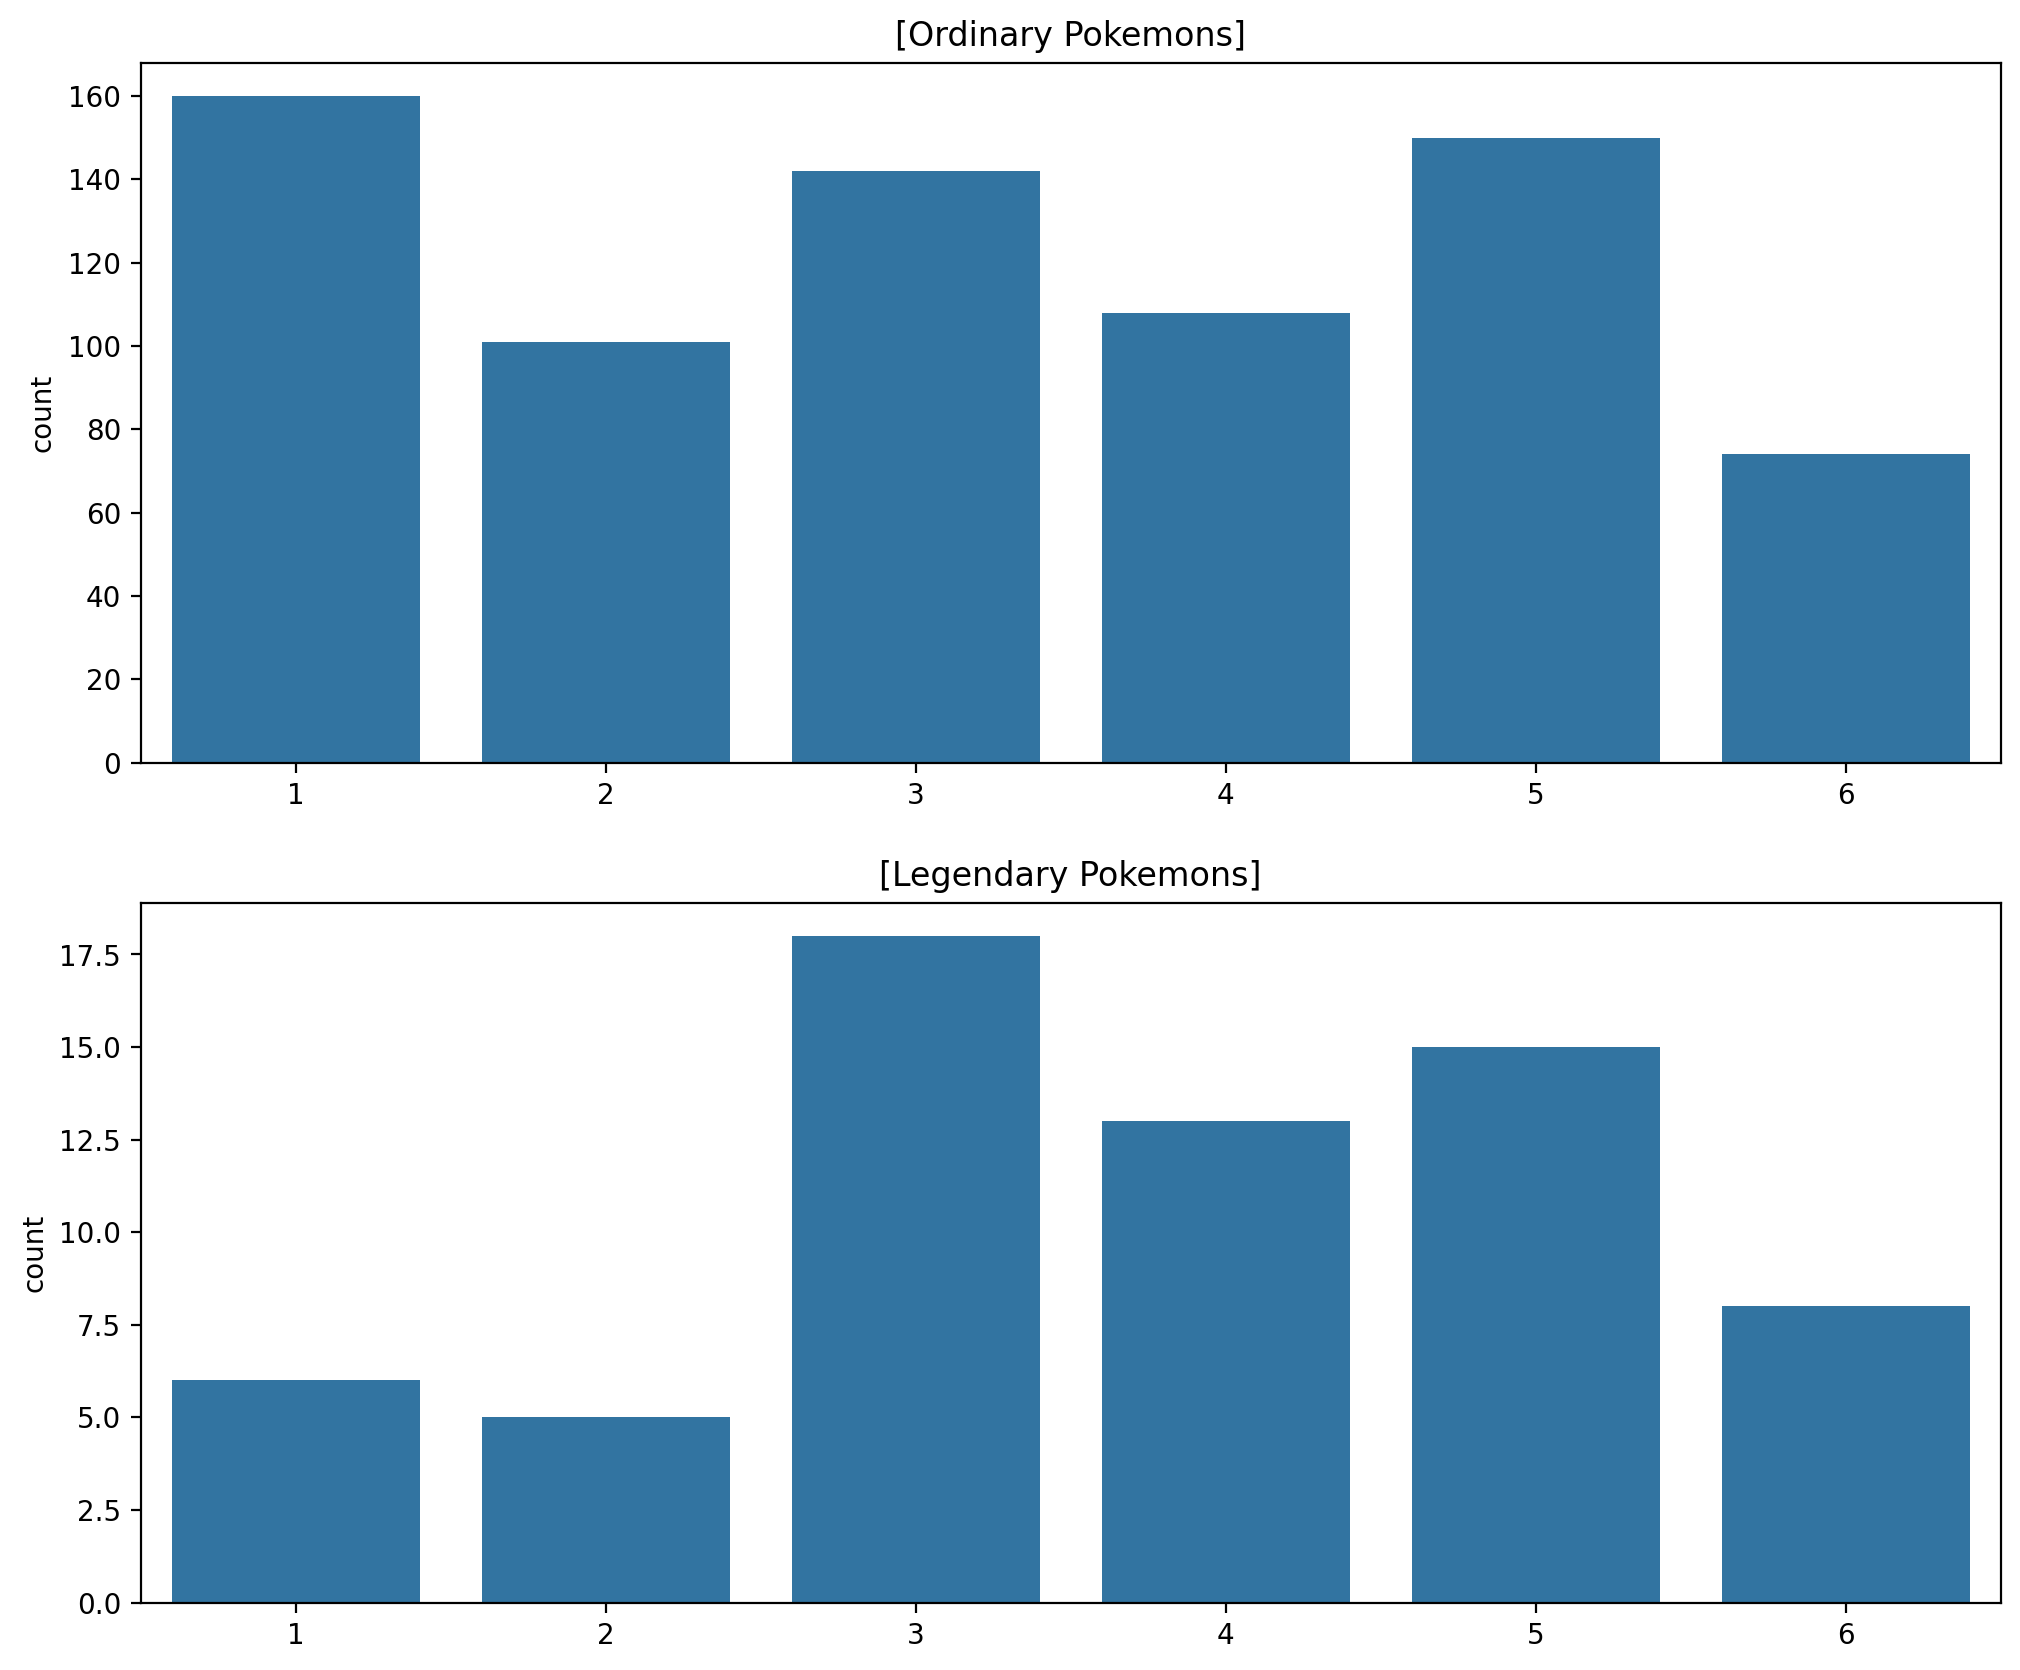

In [19]:
#Distribution of Generation
plt.figure(figsize=(12, 10))   

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

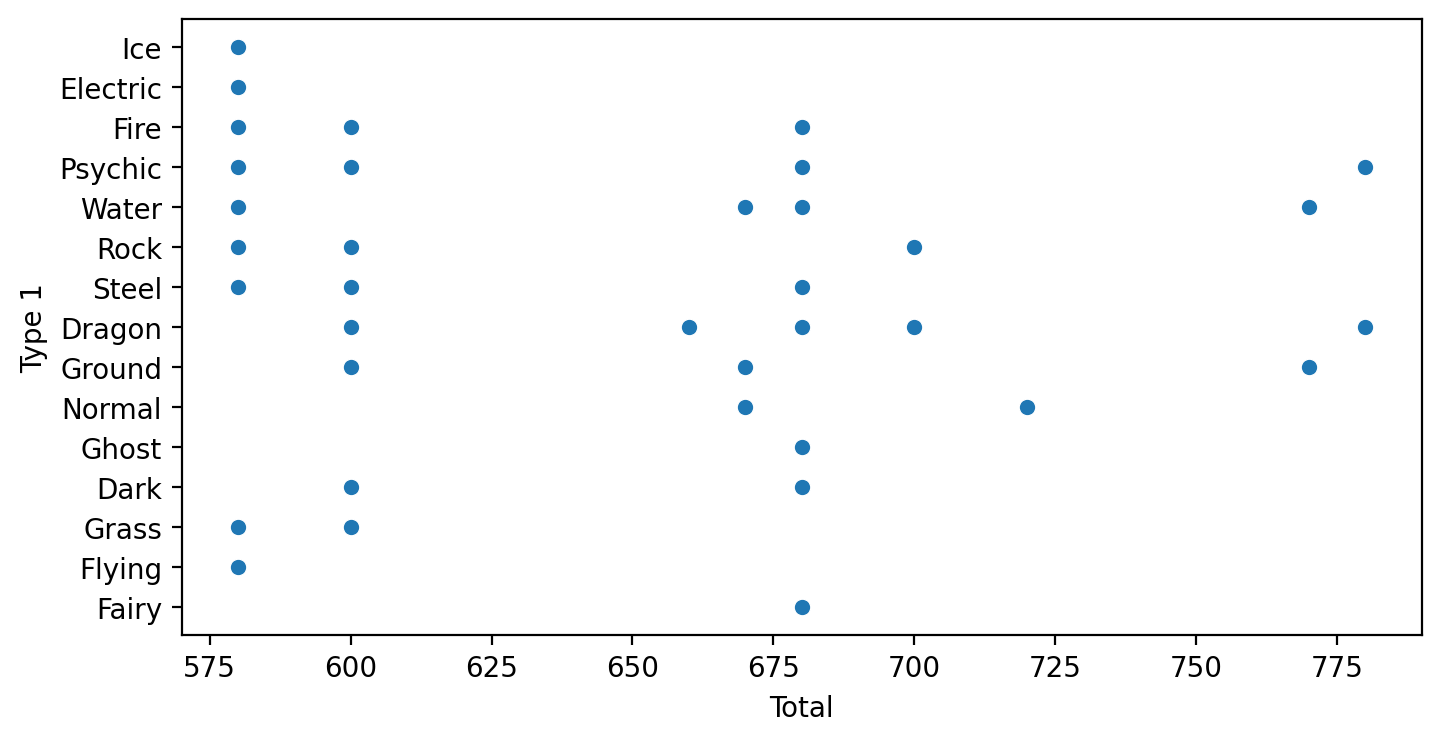

In [20]:
#dist of total of legendary
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

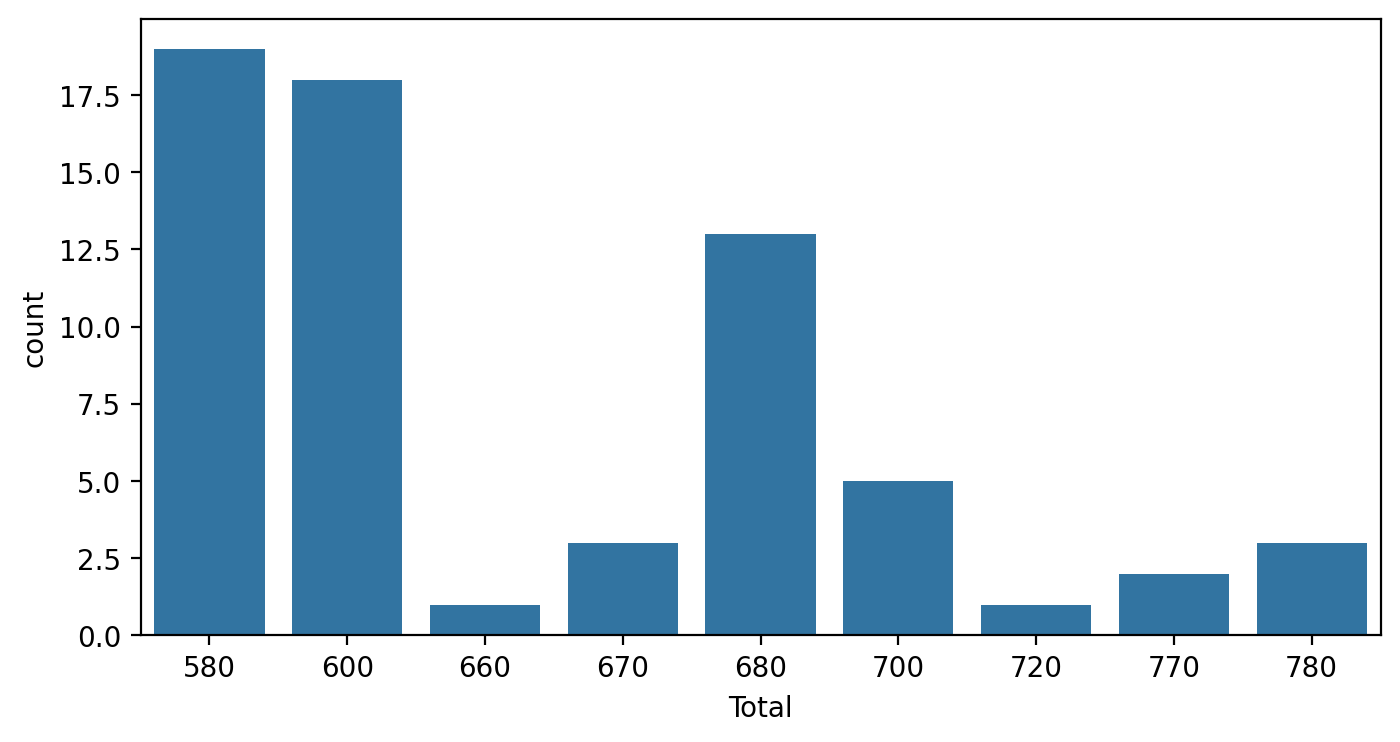

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [22]:
round(65 / 9, 2)

7.22

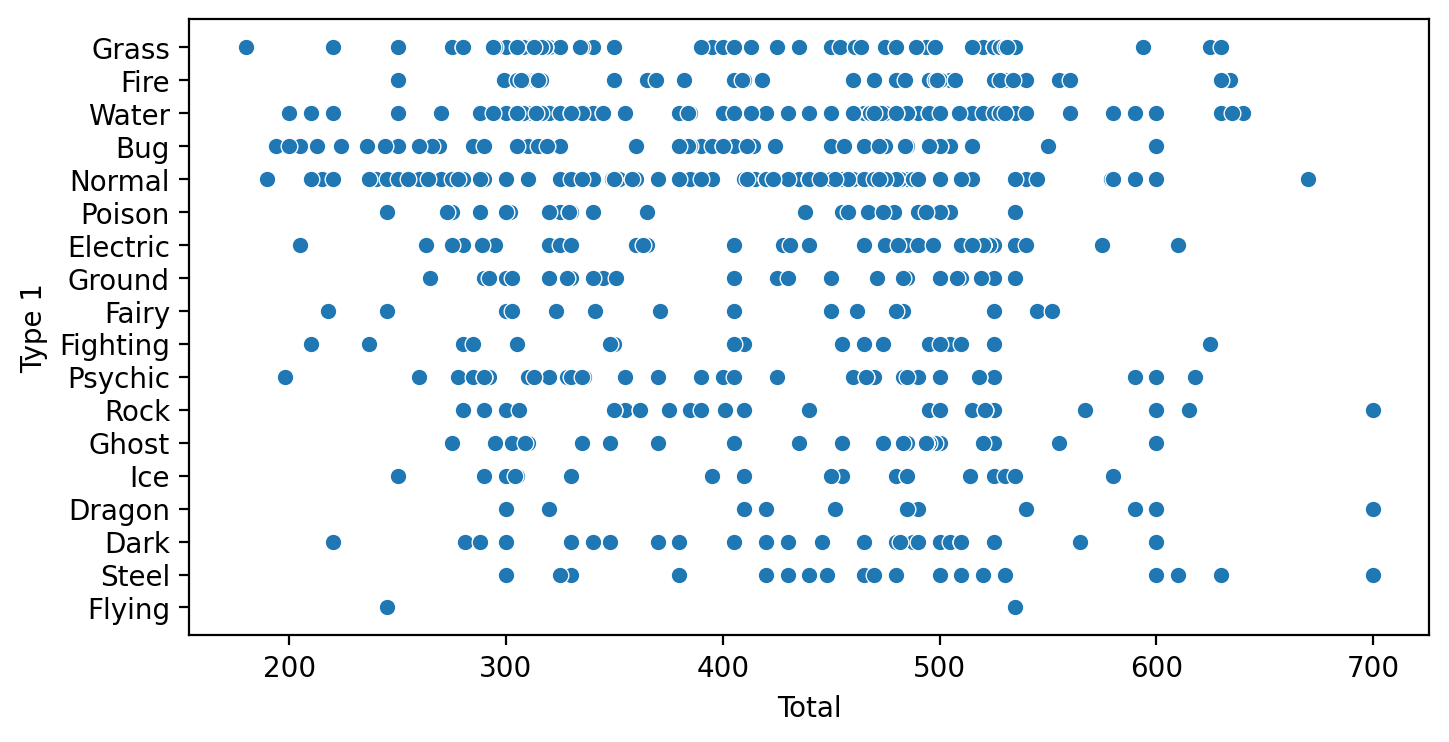

In [23]:
#dist of total of original
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [24]:
print(len(sorted(list(set(ordinary["Total"])))))

195


In [25]:
round(735 / 195, 2)

3.77

total : ordinary pokemon has two times more diversity in distinct total stats than legendary pokemon. There are distinct Total stats of legendary that ordinary pokemons don't have. Based on our analysis we can assume that Total(stats) is an important feature.

## Name analysis

In [26]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
18  641     TornadusTherian Forme    Flying       NaN    580   79     100   
19  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
20  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
21  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
22  645     LandorusTherian Forme    Ground    Flying    600   89     145   
23  646                    Kyurem    Dragon       Ice    660  125     130   
24  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
25  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True  
23       90      130       90     95           5       True  
24      100      120       90     95           5       True  
25       90      170      100     95           5       True

In [27]:
formes = names[13:23]
formes

#                      Name    Type 1  Type 2  Total  HP  Attack  \
13  386        DeoxysNormal Forme   Psychic     NaN    600  50     150   
14  386        DeoxysAttack Forme   Psychic     NaN    600  50     180   
15  386       DeoxysDefense Forme   Psychic     NaN    600  50      70   
16  386         DeoxysSpeed Forme   Psychic     NaN    600  50      95   
17  641   TornadusIncarnate Forme    Flying     NaN    580  79     115   
18  641     TornadusTherian Forme    Flying     NaN    580  79     100   
19  642  ThundurusIncarnate Forme  Electric  Flying    580  79     115   
20  642    ThundurusTherian Forme  Electric  Flying    580  79     105   
21  645   LandorusIncarnate Forme    Ground  Flying    600  89     125   
22  645     LandorusTherian Forme    Ground  Flying    600  89     145   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True

In [28]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [29]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

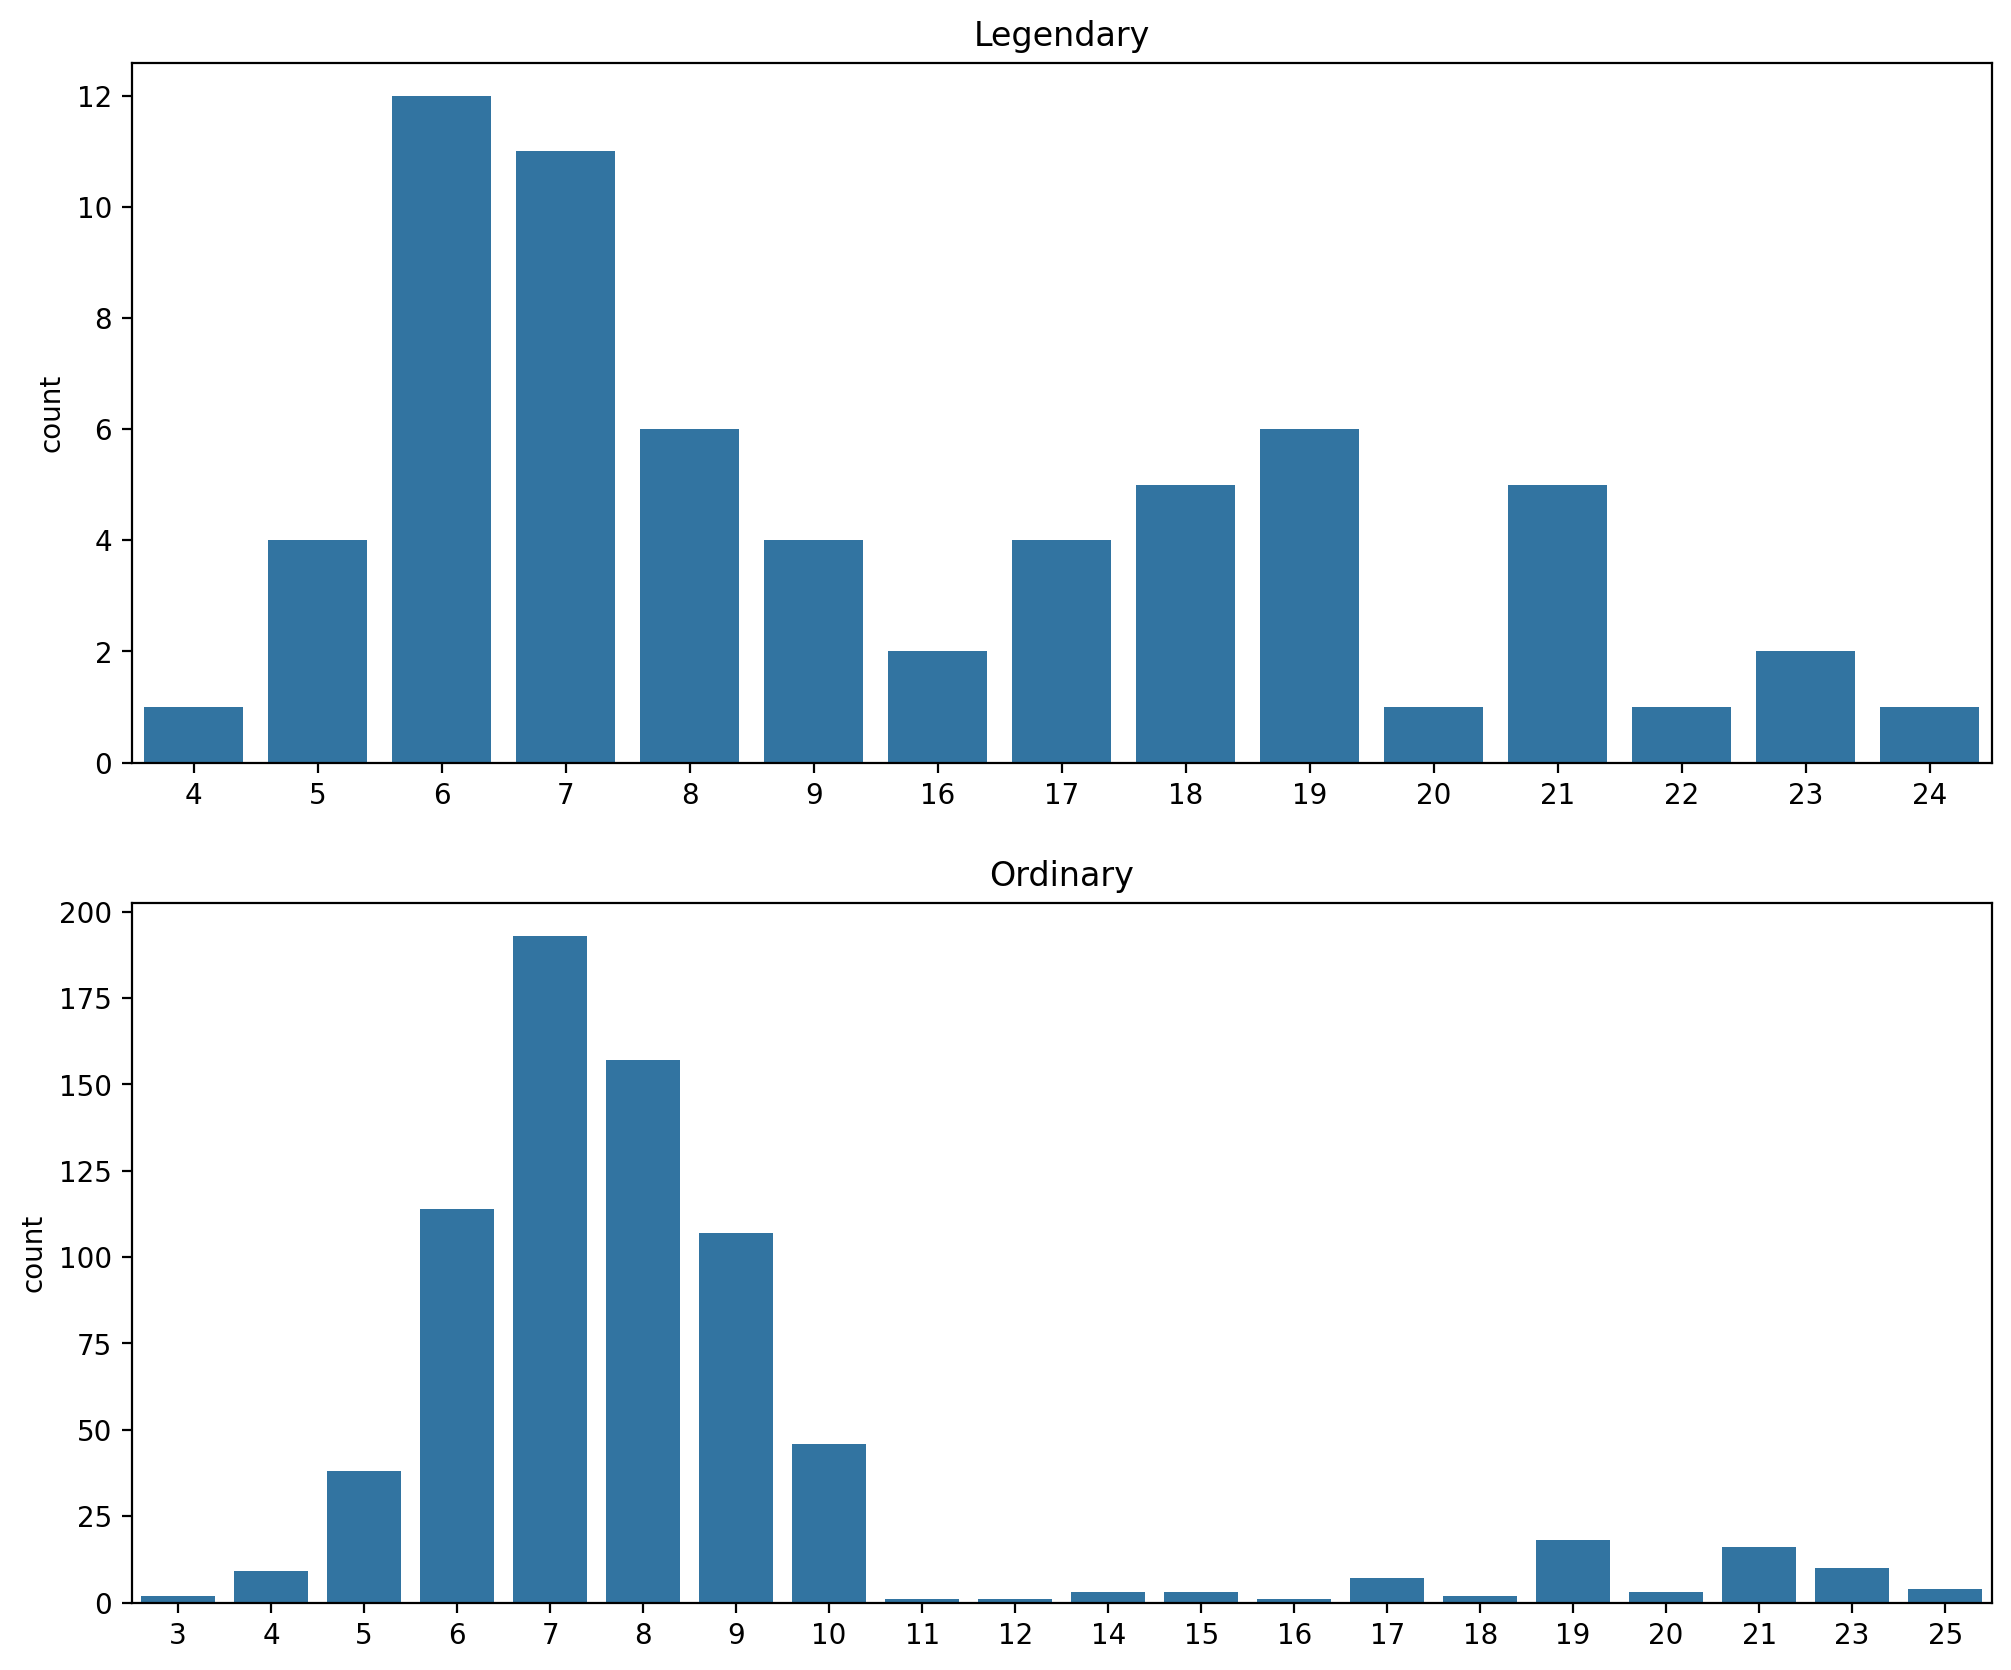

In [30]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [31]:
# percentage of name of legendary pokemon > 9
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [32]:
# percentage of name of ordinary pokemon > 9
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


In [33]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))


In [34]:
pokemon["long_name"] = pokemon["name_count"] >= 10


In [35]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))


In [36]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())


In [37]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran♀   Poison     NaN    275   55      47       52   
37    32          Nidoran♂   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34          Nidoran♀         False  
37          Nidoran♂         False  
90        Farfetch'd         False  
131          Mr.Mime         False  
252         Porygon2         False  
270            Ho-oh         False  
487          MimeJr.         False  
525        Porygon-Z         False  
794  Zygarde50%Forme         False

In [38]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233    Porygon Two   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34         Nidoran X         False  
37         Nidoran Y         False  
90         Farfetchd         False  
131          Mr.Mime         False  
252      Porygon Two         False  
270            Ho Oh         False  
487          MimeJr.         False  
525        Porygon Z         False  
794  Zygarde50%Forme         False

In [39]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, name_count, long_name, Name_nospace, name_isalpha]
Index: []

In [40]:
import re

In [41]:
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    tokens
    return np.array(tokens)

In [42]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [43]:
from collections import Counter

In [44]:
most_common = Counter(token_set).most_common(10)
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Mewtwo  Kyurem  Deoxys  Hoopa  Latias  \
0       65       65  ...  False  False   False   False   False  False   False   
1       80       80  ...  False  False   False   False   False  False   False   
2      100      100  ...  False  False   False   False   False  False   False   
3      122      120  ...  False   True   False   False   False  False   False   
4       60       50  ...  False  False   False   False   False  False   False   
5       80       65  ...  False  False   False   False   False  False   False   
6      109       85  ...  False  False   False   False   False  False   False   
7      130       85  ...  False   True   False   False   False  False   False   
8      159      115  ...  False   True   False   False   False  False   False   
9       50       64  ...  False  False   False   False   False  False   False   

   Latios  Kyogre  Groudon  
0   False   False    False  
1   False   False    False  
2   False   False    False  
3   False   False    False  
4   False   False    False  
5   False   False    False  
6   False   False    False  
7   False   False    False  
8   False   False    False  
9   False   False    False  

[10 rows x 27 columns]

## Type analysis

In [45]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

Type 1  Type 2  Normal  Grass  Ghost   Fire  Ground    Bug  Fairy   Dark  \
0  Grass  Poison   False   True  False  False   False  False  False  False   
1  Grass  Poison   False   True  False  False   False  False  False  False   
2  Grass  Poison   False   True  False  False   False  False  False  False   
3  Grass  Poison   False   True  False  False   False  False  False  False   
4   Fire     NaN   False  False  False   True   False  False  False  False   

   Water   Rock  Dragon  Psychic  Electric  Steel  Poison  Flying    Ice  \
0  False  False   False    False     False  False    True   False  False   
1  False  False   False    False     False  False    True   False  False   
2  False  False   False    False     False  False    True   False  False   
3  False  False   False    False     False  False    True   False  False   
4  False  False   False    False     False  False   False   False  False   

   Fighting  
0     False  
1     False  
2     False  
3     False  
4     False

# Baseline

In [46]:
print(original_data.shape)
original_data.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [47]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [48]:
target = 'Legendary'

In [49]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1

In [50]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



# Using Processed Data

In [54]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']


In [55]:
target = "Legendary"
target

'Legendary'

In [56]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...   Dark  Fairy  Steel  Ghost  Psychic    Ice  \
0           9      False  ...  False  False  False  False    False  False   
1           7      False  ...  False  False  False  False    False  False   
2           8      False  ...  False  False  False  False    False  False   
3          21       True  ...  False  False  False  False    False  False   
4          10       True  ...  False  False  False  False    False  False   

     Bug  Grass  Dragon  Fighting  
0  False   True   False     False  
1  False   True   False     False  
2  False   True   False     False  
3  False   True   False     False  
4  False  False   False     False  

[5 rows x 38 columns]

In [57]:
y= pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [59]:
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



# Using different Kinds of models

## RandomForestClassifier
accuracy 기반으로 각 파라미터들에 따른 모델들 비교후 가장


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score

# 모델 생성
model = RandomForestClassifier()

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [ 100,200,300,400,500,600,700],
    'max_depth': [3,4,5,6,7]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'n_estimators': 300}
Best Accuracy: 0.9671800272037209


In [62]:
model = RandomForestClassifier(n_estimators=200,max_depth=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

array([[144,   3],
       [  3,  10]])

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       147
        True       0.77      0.77      0.77        13

    accuracy                           0.96       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.96      0.96      0.96       160



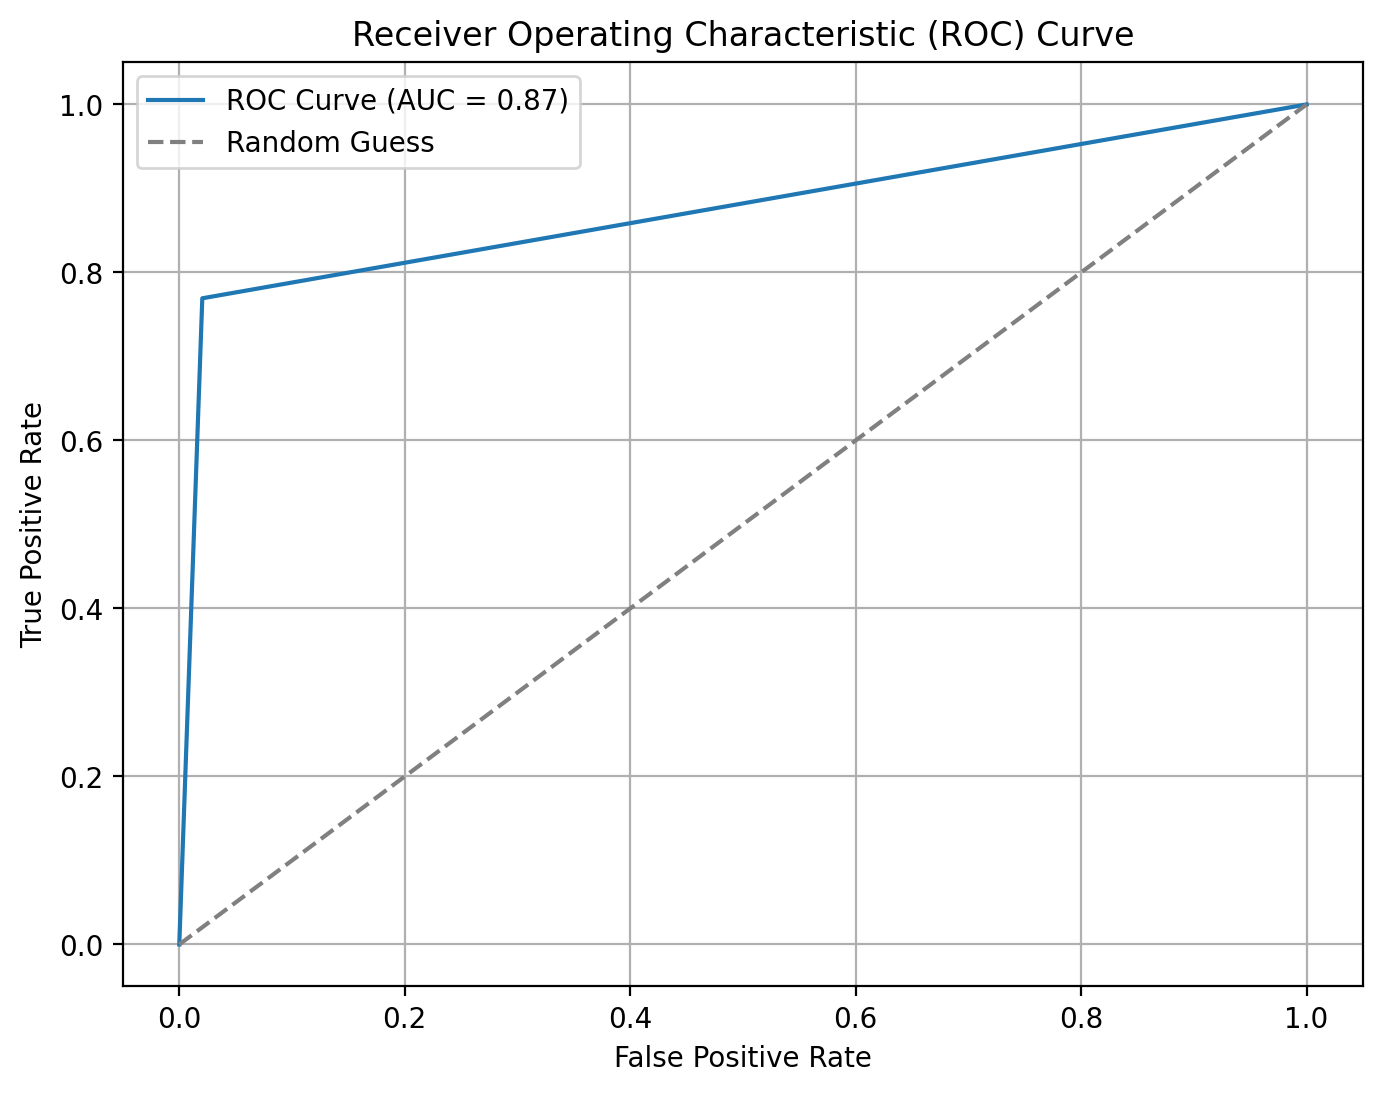

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the ROC AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

## XGBClassifier
### ACC 기반 gridsearch 와 f1score기반 gridsearch 진행

In [64]:
# xgboost 하이퍼파라미터
# - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
# - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
# - max_depth(기본값 6): 최대 한도 깊이
# - learning_rate(기본값 0.1): 학습률
# - n_estimators(기본값 100): 트리의 수
# - subsample(기본값 1): 훈련 샘플 개수의 비율
# - colsample_bytree(기본값 1): 특성 개수의 비율
# - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 모델 생성
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [ 4,5,6,7],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 500}
Best Accuracy: 0.975004753338306


In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#f1-score를 사용한 grid search

# 모델 생성
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [ 4,5,6,7],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 500}
Best Accuracy: 0.8560887512899896


In [101]:
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 4,
                      learning_rate = 0.005,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1
                     )
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [102]:
confusion_matrix(y_test, pred)

array([[143,   4],
       [  0,  13]])

In [103]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       147
        True       0.76      1.00      0.87        13

    accuracy                           0.97       160
   macro avg       0.88      0.99      0.93       160
weighted avg       0.98      0.97      0.98       160



In [104]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(y_test,pred)

0.9863945578231292

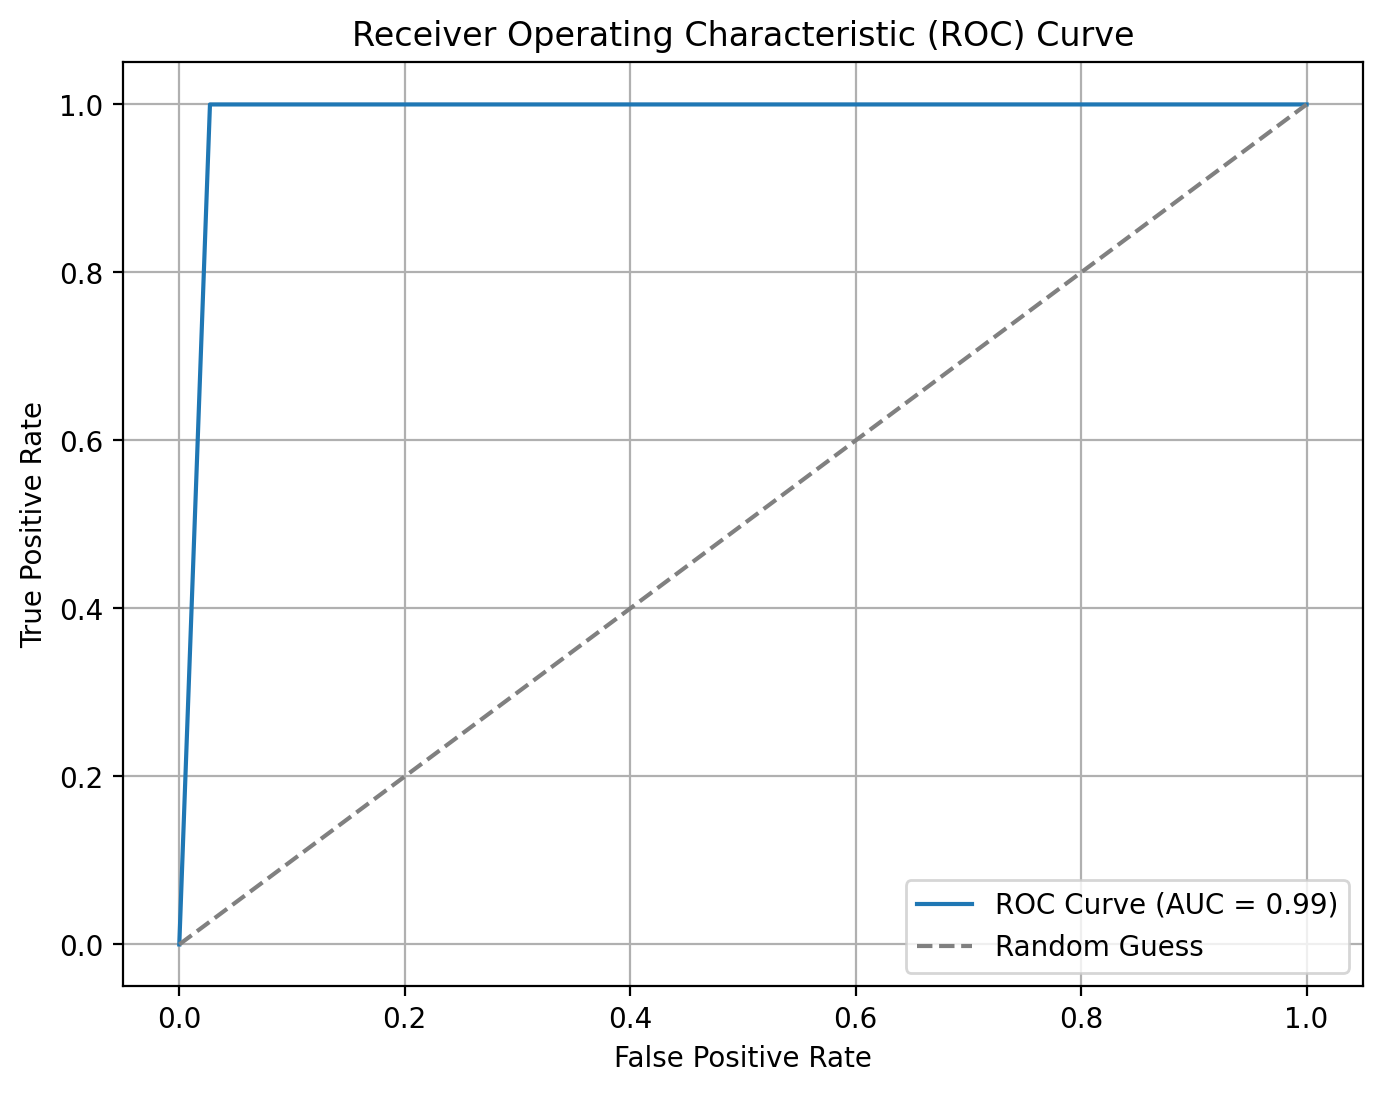

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Compute the ROC AUC score
auc_score = roc_auc_score(y_test, pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# XAI : SHAP

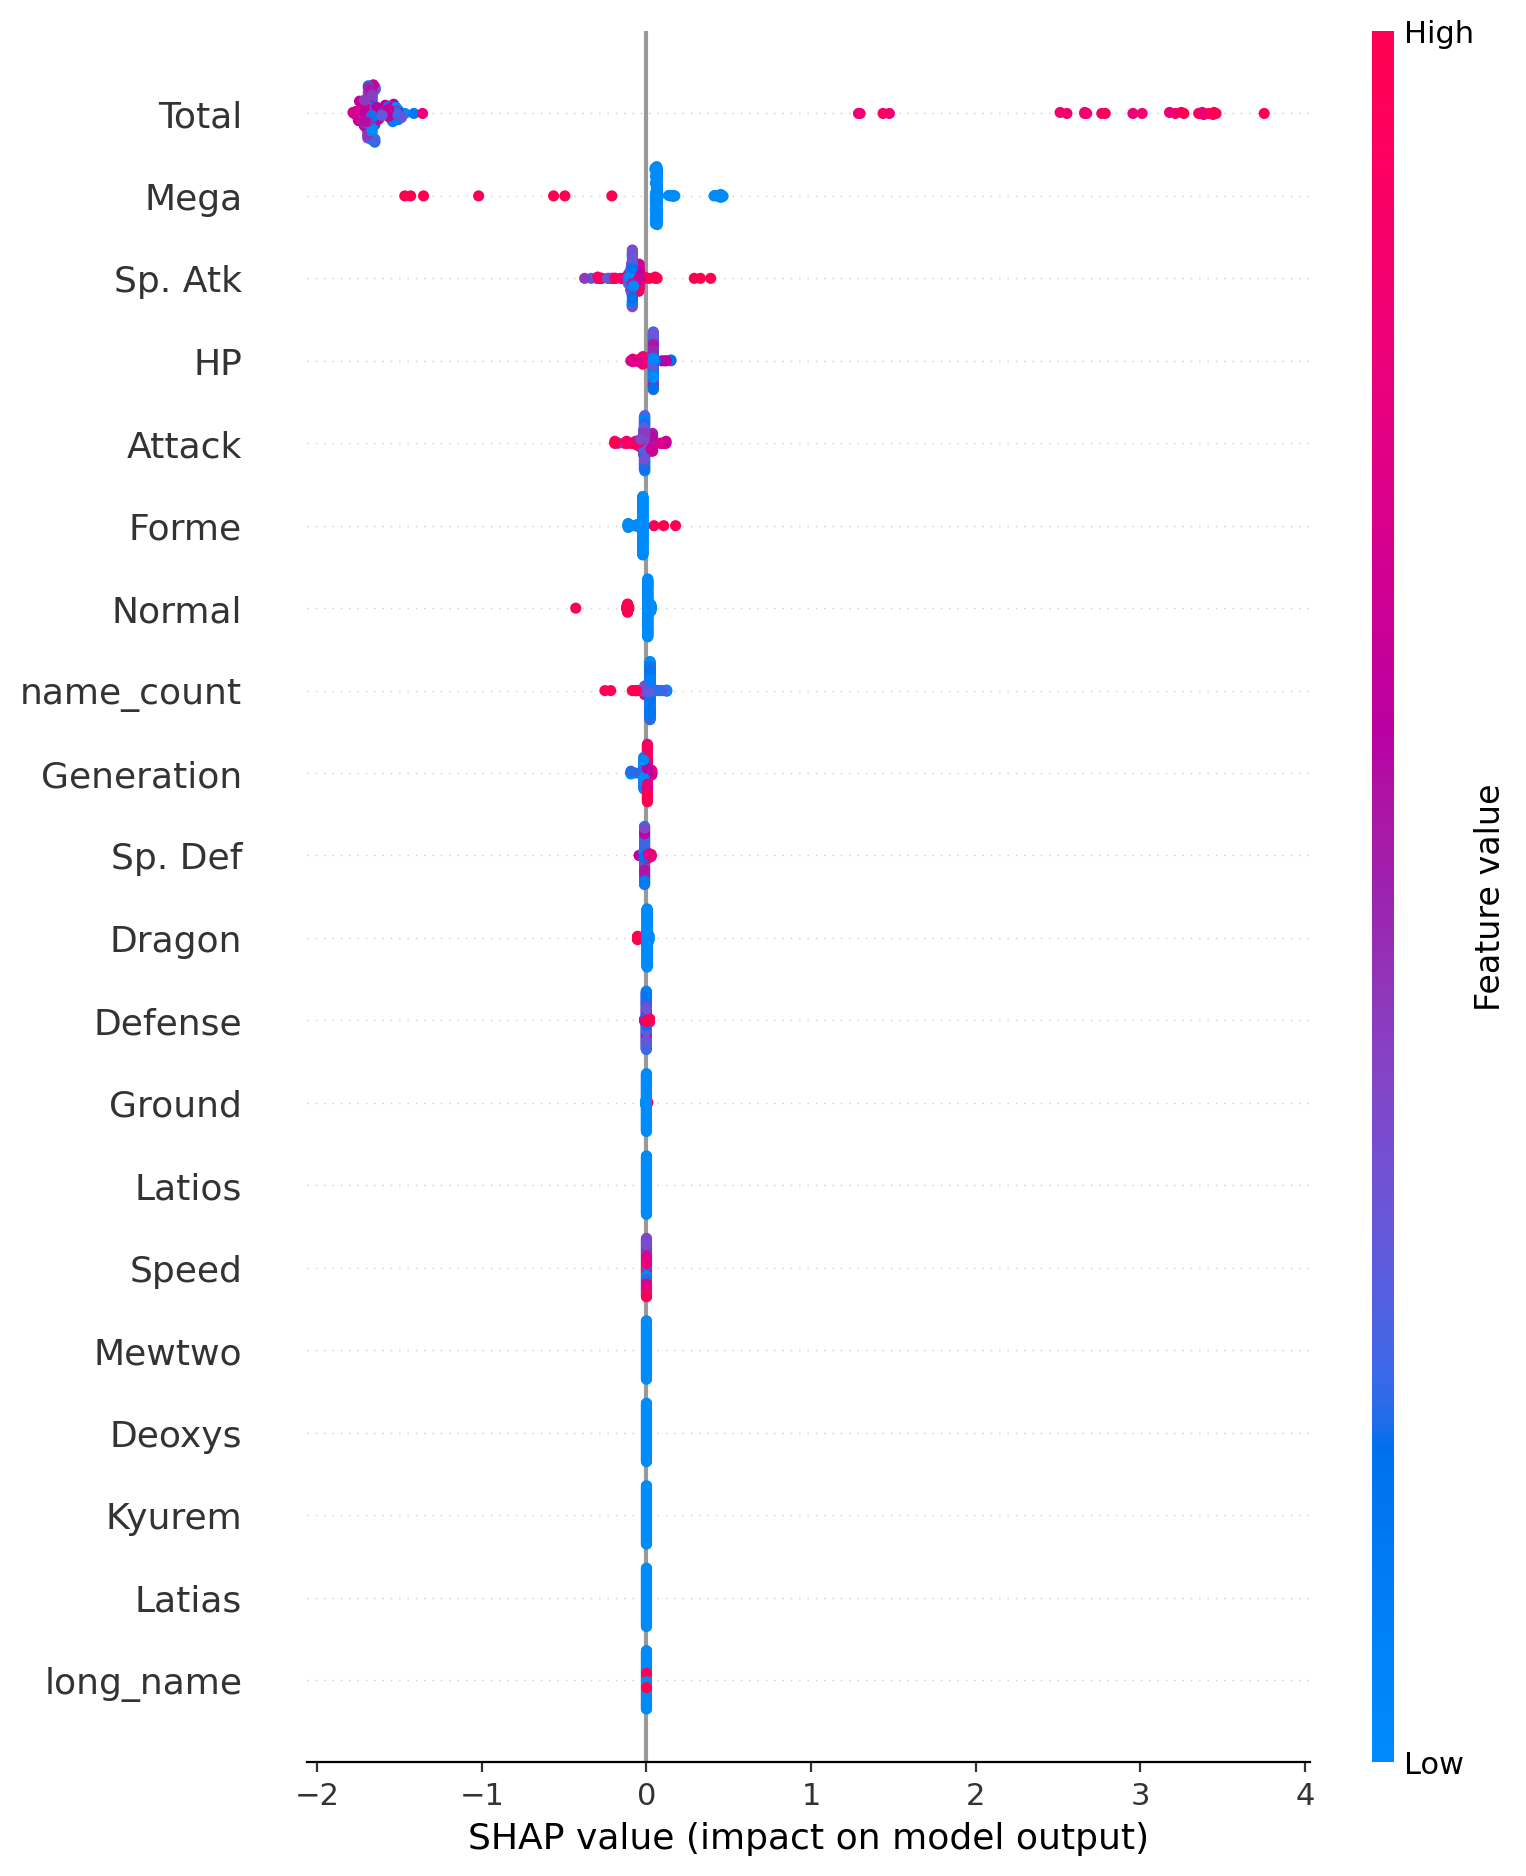

In [90]:
import shap
explainer = shap.Explainer(model)
# Assuming X_val is your validation data
shap_values = explainer.shap_values(X_test)
# Example of a summary plot
shap.summary_plot(shap_values, X_test)

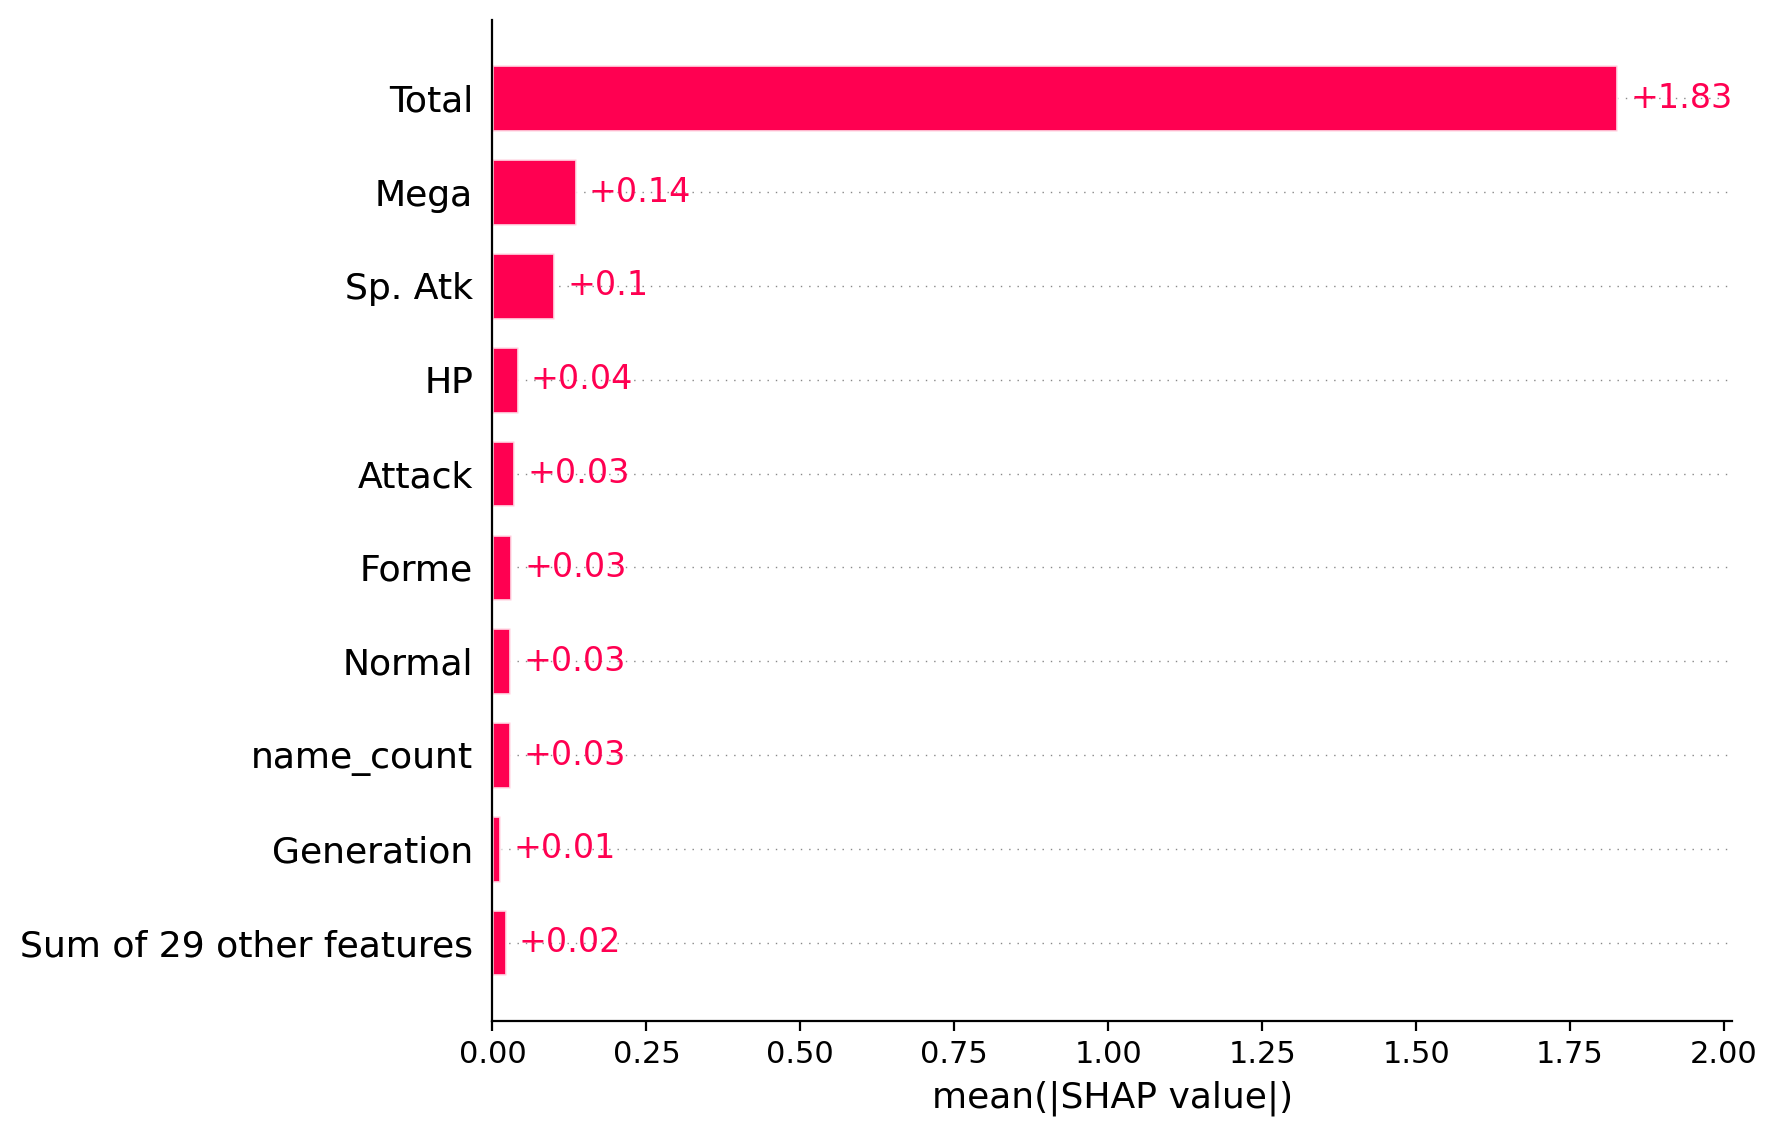

In [91]:
shap_values2 = explainer(X_test)
shap.plots.initjs()
shap.plots.bar(shap_values2)

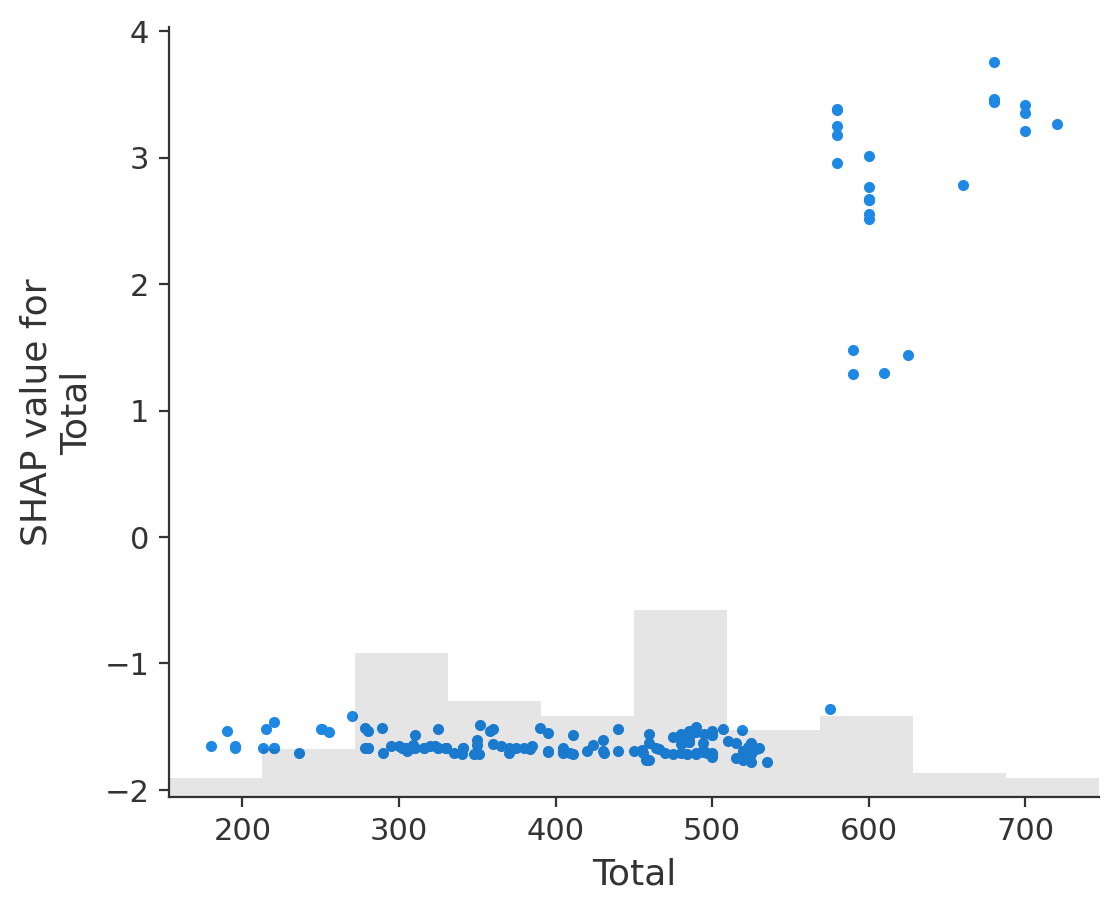

In [92]:
shap.plots.scatter(shap_values2[:, "Total"])

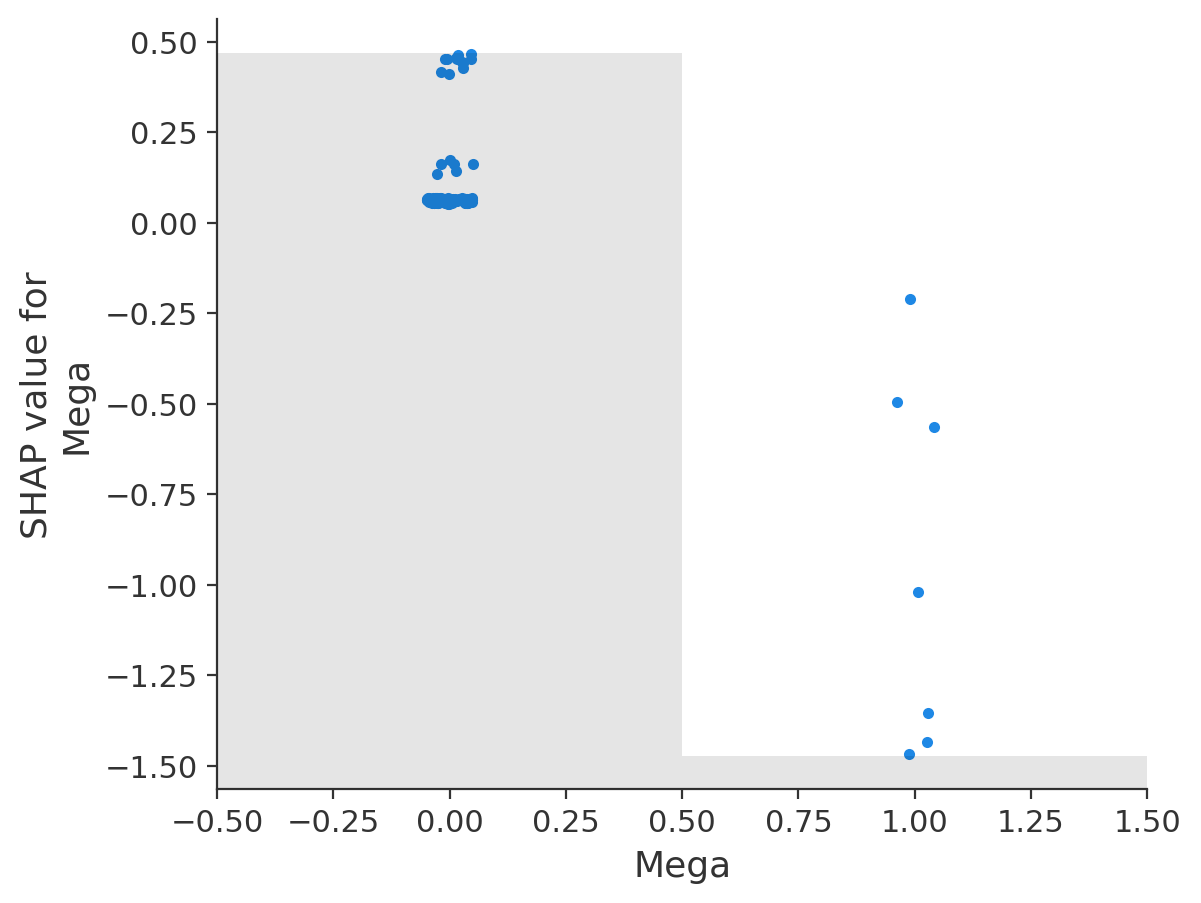

In [93]:
shap.plots.scatter(shap_values2[:, "Mega"])

오늘은 pokemon의 stat데이터를 가지고 legendary인지 아닌지를 예측하는 모델을 만들어보았다. 모델은 총 세가지로 진행해보았는데, 가장 기본적인 decision tree 모델과 앙상블 기반의 randomforest, xgbclassifer를 사용해보았다. 또한 gridsearch를 통해, randomforest및 xgbclassifier의 여러 파라미터를 시도해보았고 가장 좋은 결과를 나타내는 파라미터를 골라 모델에 적용시킨뒤 roc-auc커브를 그려보았다. 마지막으로 xgbclassifer에 대해서 SHAP 분석까지 해보았다.

shap값을 분석해보면 total의 역할이 매우 큰 것으로 나타났다. Mega, sp.Atk 순으로도 모델에 영향을 준 것을 확인 할 수 있었다. 모델은 XGBoost가 예상대로 가장 좋은 성능을 나타냈다.

데이터 분석에 있어서 새롭게 다가온 점은 analysis를 통해 사용가능한 피쳐를 만드는 것이었다. 특히 오늘 pokemon과정에서 name에서 새로운 특징을 추출해 내는 것이 매우 인상적이었다. 이 방법들을 앞으로의 데이터 전처리에서 잘 사용해봐야겠다고 생각했다.

In [94]:
pokemon

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  ...  Water   Rock  Dragon  Psychic  Electric  Steel  \
0         65       65  ...  False  False   False    False     False  False   
1         80       80  ...  False  False   False    False     False  False   
2        100      100  ...  False  False   False    False     False  False   
3        122      120  ...  False  False   False    False     False  False   
4         60       50  ...  False  False   False    False     False  False   
..       ...      ...  ...    ...    ...     ...      ...       ...    ...   
795      100      150  ...  False   True   False    False     False  False   
796      160      110  ...  False   True   False    False     False  False   
797      150      130  ...  False  False   False     True     False  False   
798      170      130  ...  False  False   False     True     False  False   
799      130       90  ...   True  False   False    False     False  False   

     Poison  Flying    Ice  Fighting  
0      True   False  False     False  
1      True   False  False     False  
2      True   False  False     False  
3      True   False  False     False  
4     False   False  False     False  
..      ...     ...    ...       ...  
795   False   False  False     False  
796   False   False  False     False  
797   False   False  False     False  
798   False   False  False     False  
799   False   False  False     False  

[800 rows x 45 columns]

In [95]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...   Dark  Fairy  Steel  Ghost  Psychic    Ice  \
0           9      False  ...  False  False  False  False    False  False   
1           7      False  ...  False  False  False  False    False  False   
2           8      False  ...  False  False  False  False    False  False   
3          21       True  ...  False  False  False  False    False  False   
4          10       True  ...  False  False  False  False    False  False   

     Bug  Grass  Dragon  Fighting  
0  False   True   False     False  
1  False   True   False     False  
2  False   True   False     False  
3  False   True   False     False  
4  False  False   False     False  

[5 rows x 38 columns]

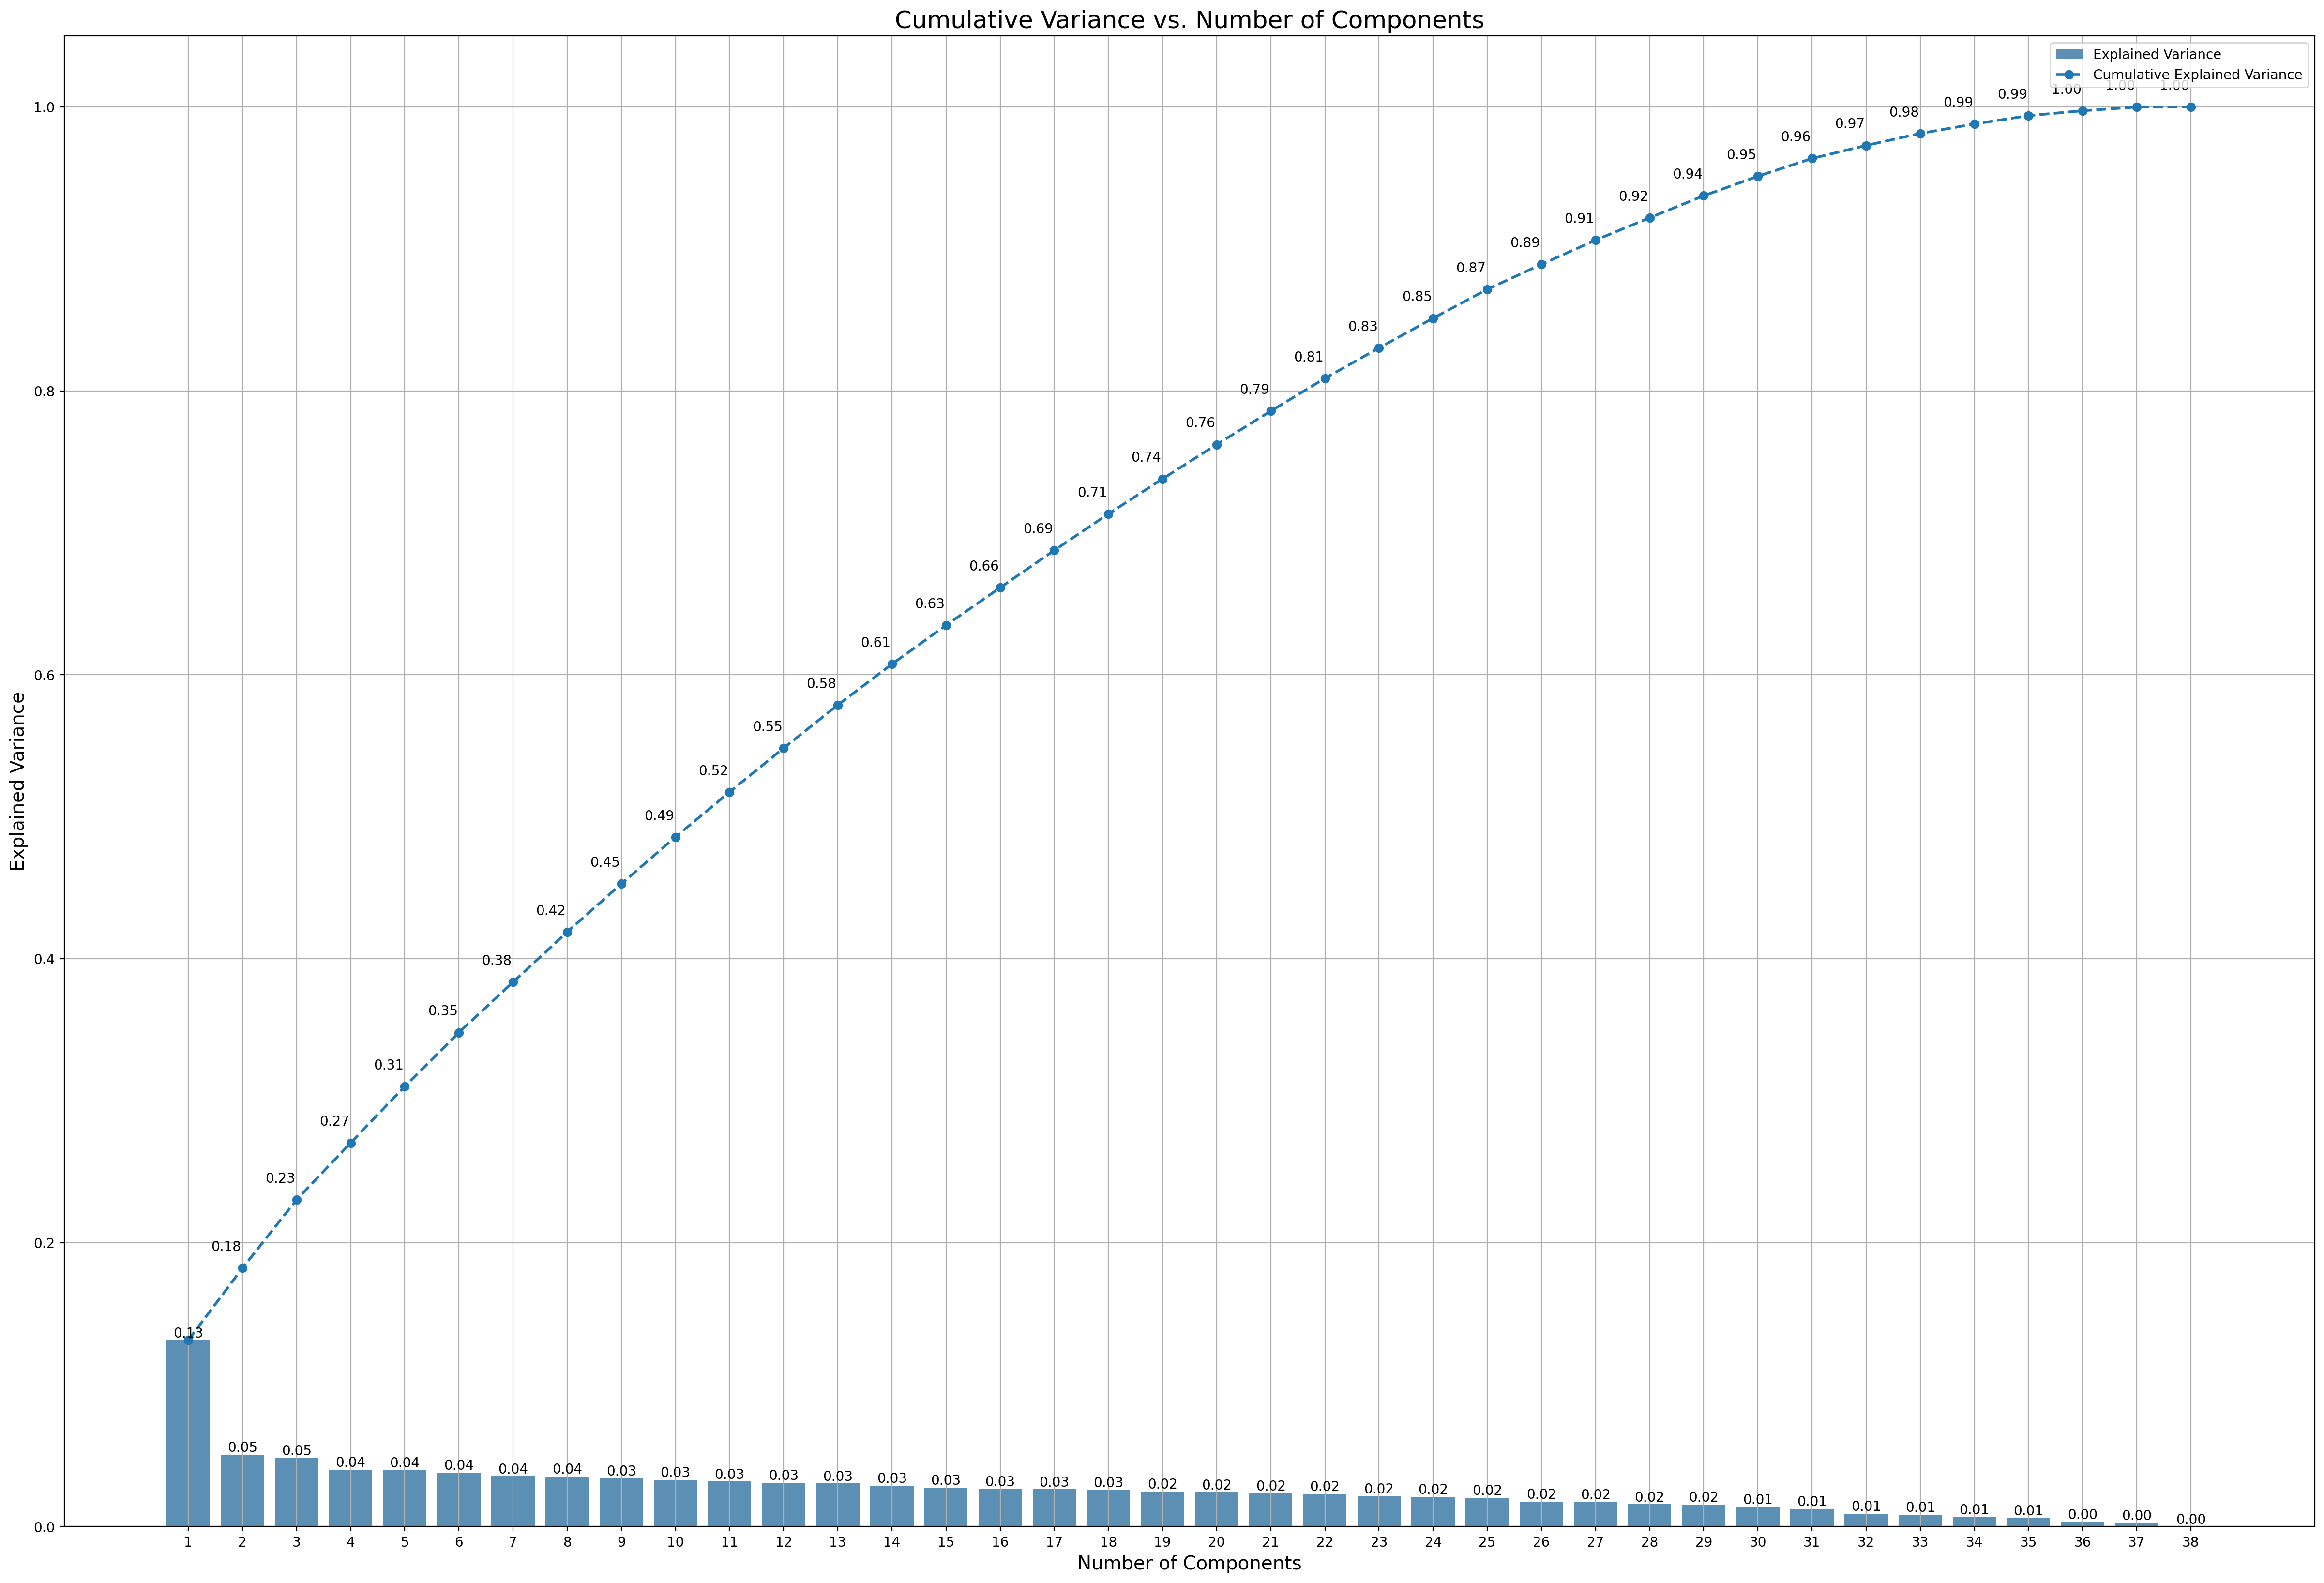

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_
# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumsum: 각 원소의 누적합을 계산하는 함수
plt.figure(figsize=(30, 20)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [97]:
# 22~27
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=27)  # Choose the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train XGBoost classifier
model = XGBClassifier()
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9625


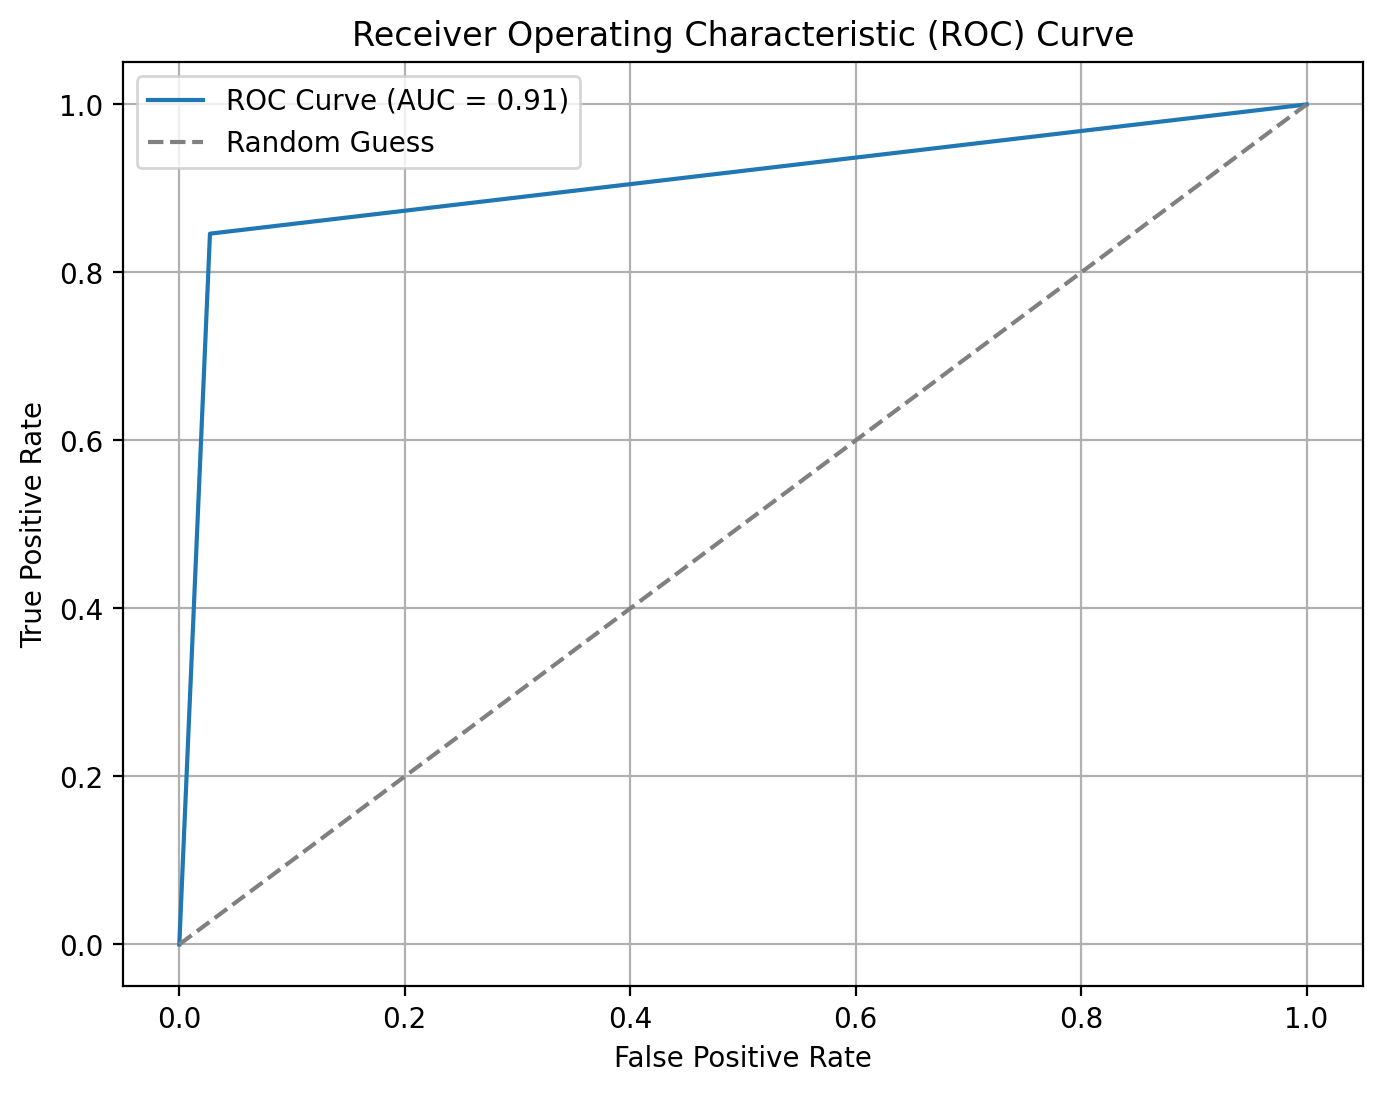

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the ROC AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

PCA를 사용할경우 성능이 오히려 낮아지는 걸 볼 수 있다